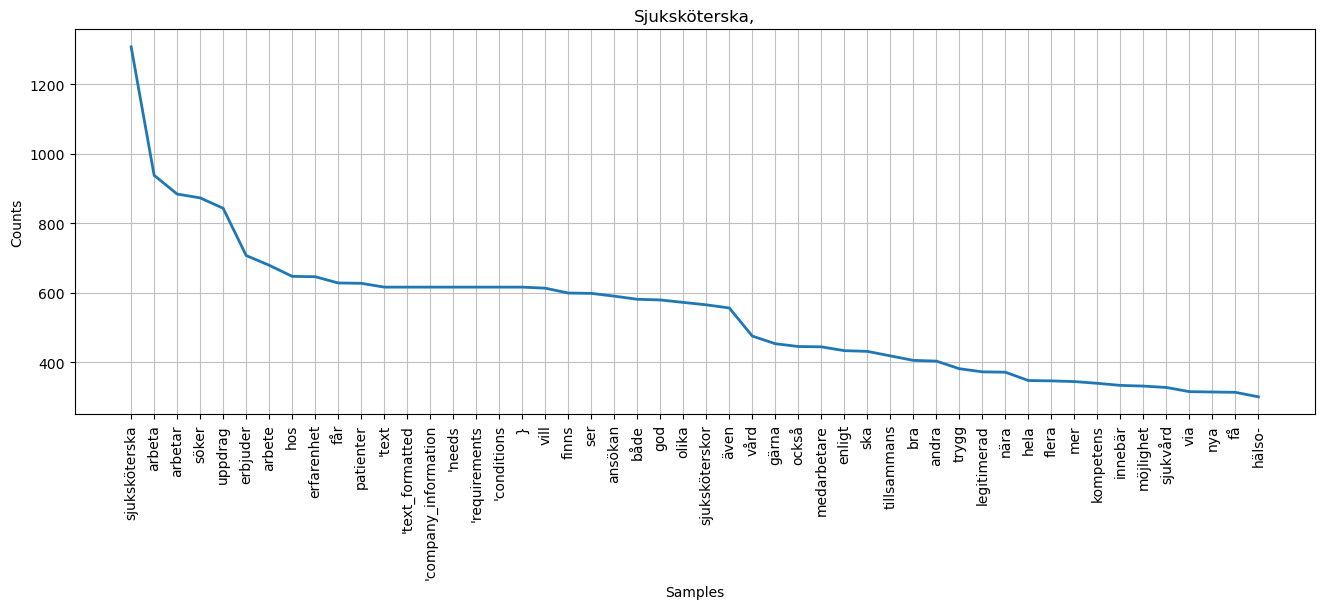

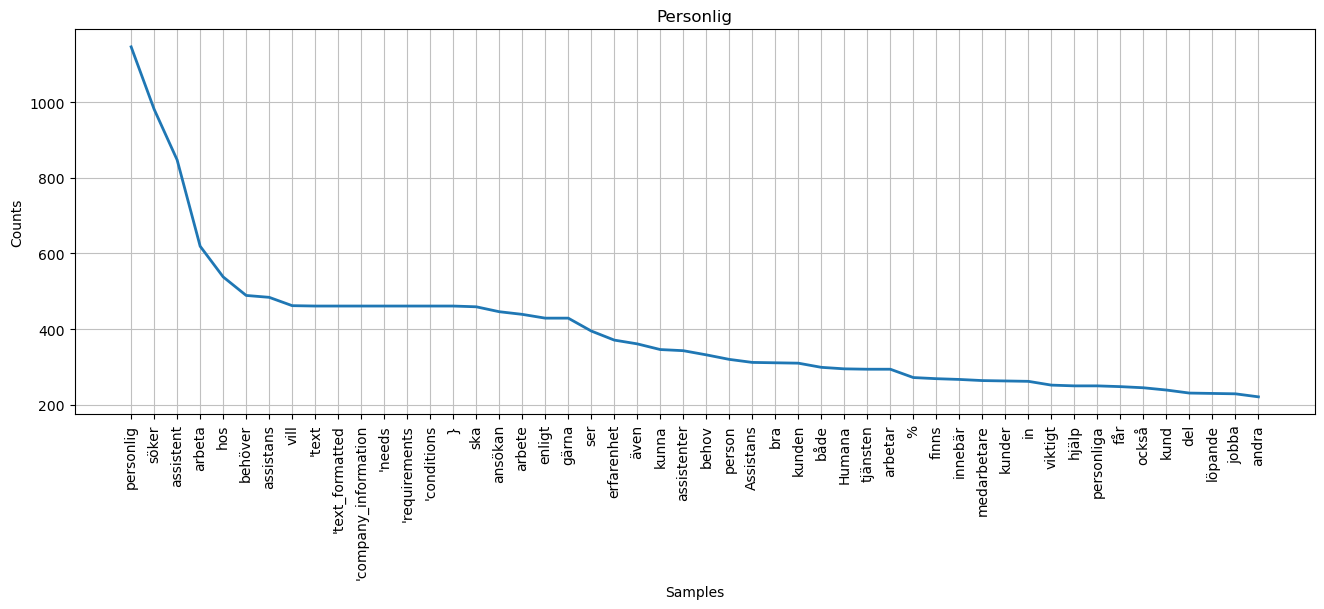

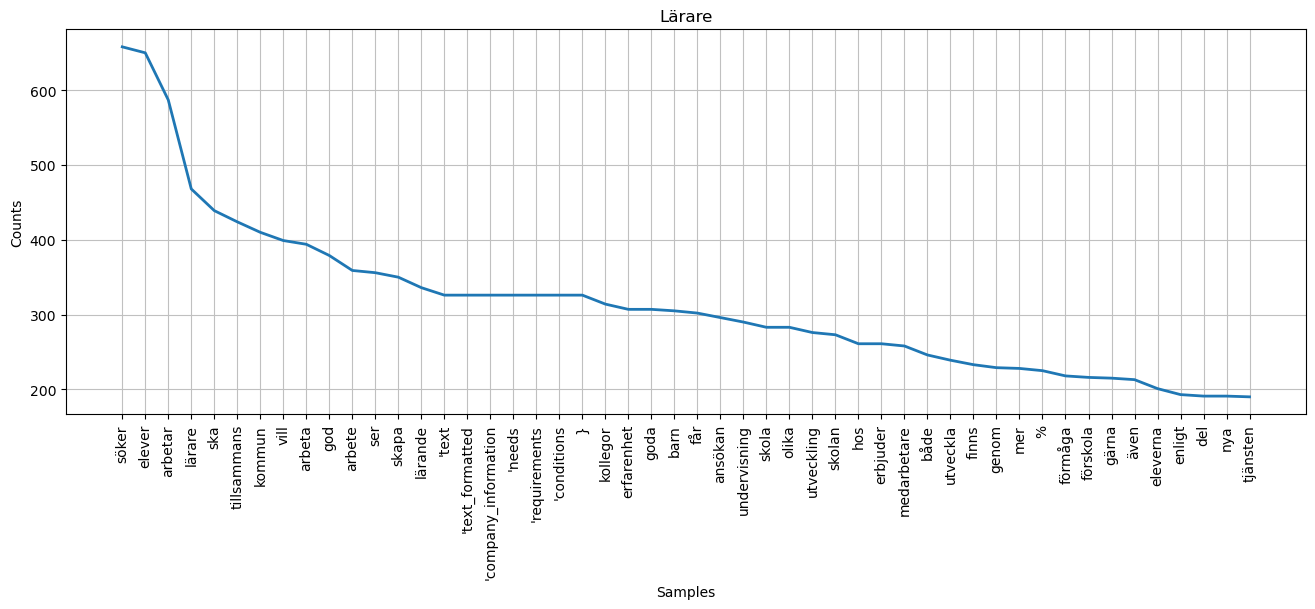

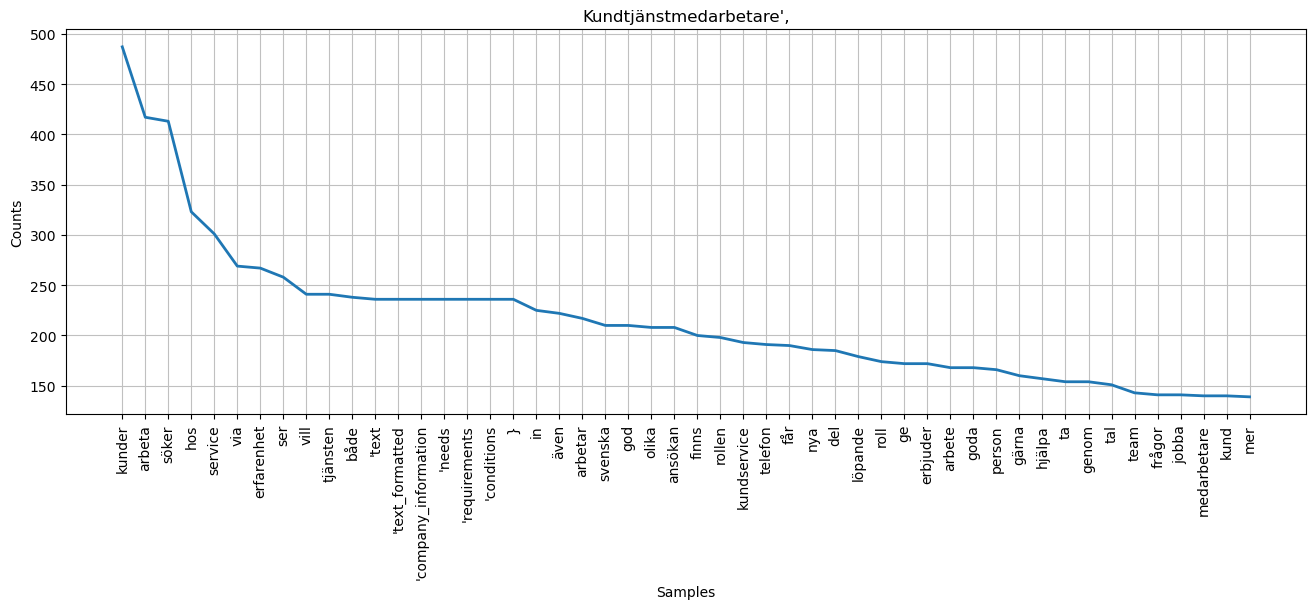

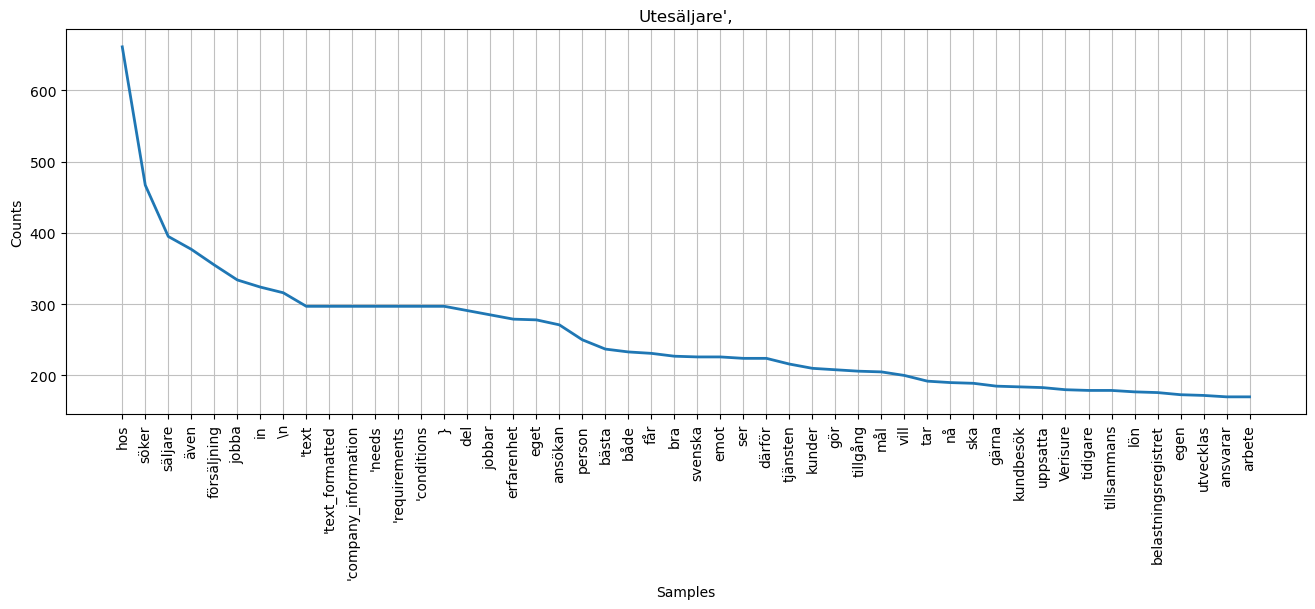

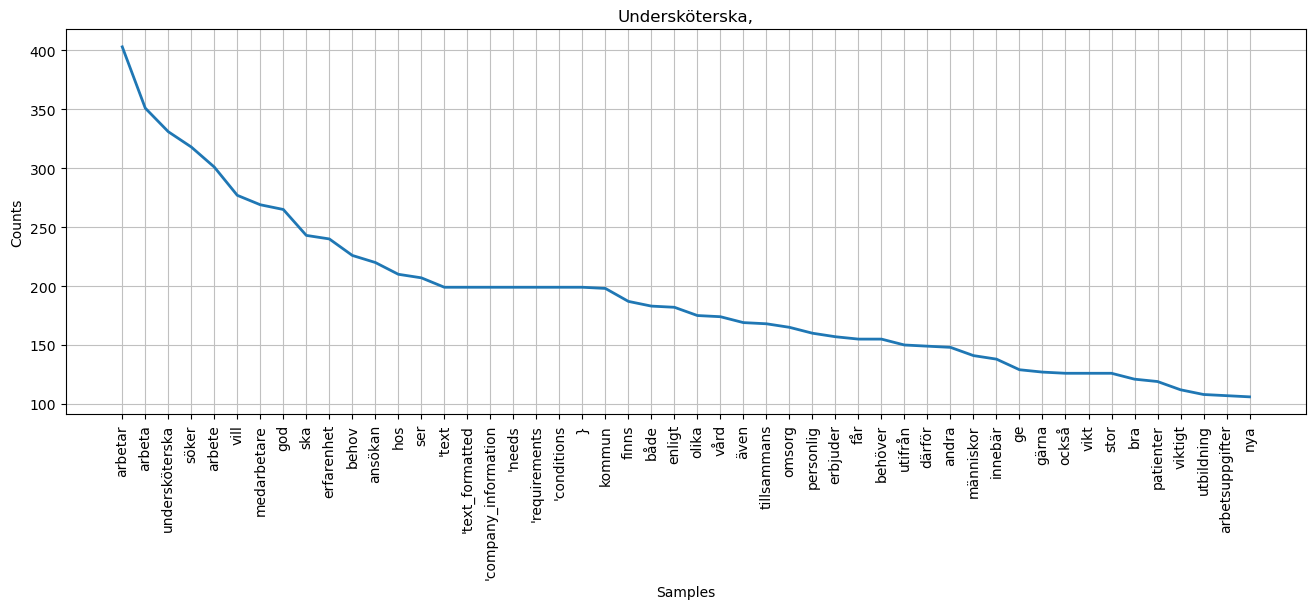

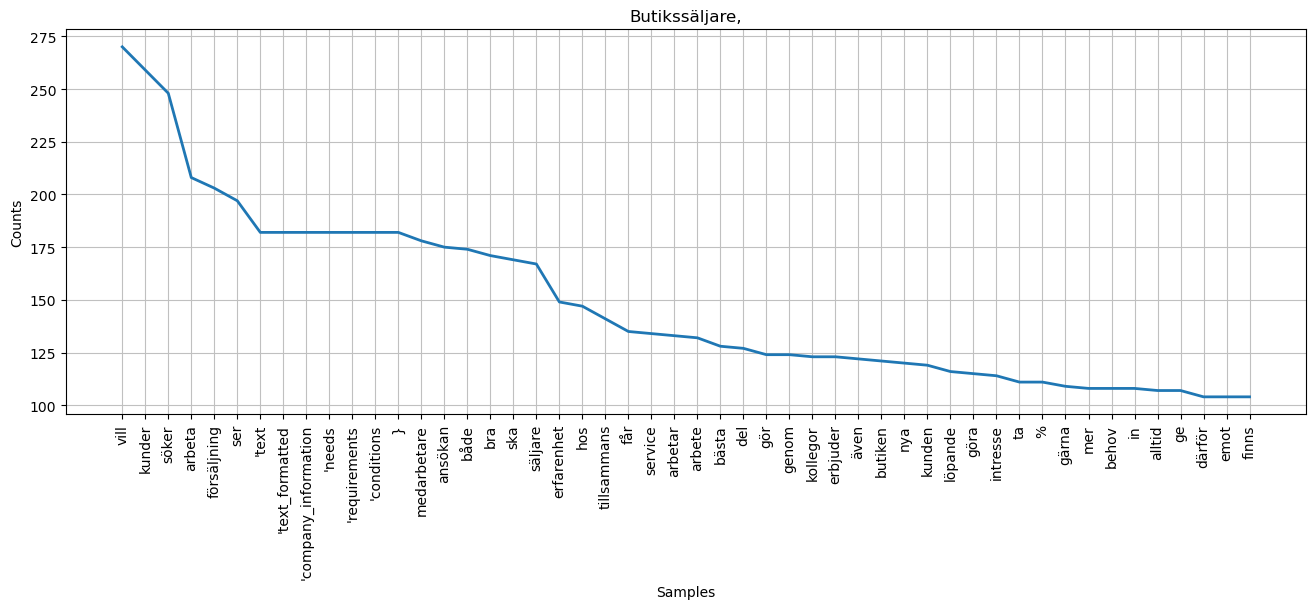

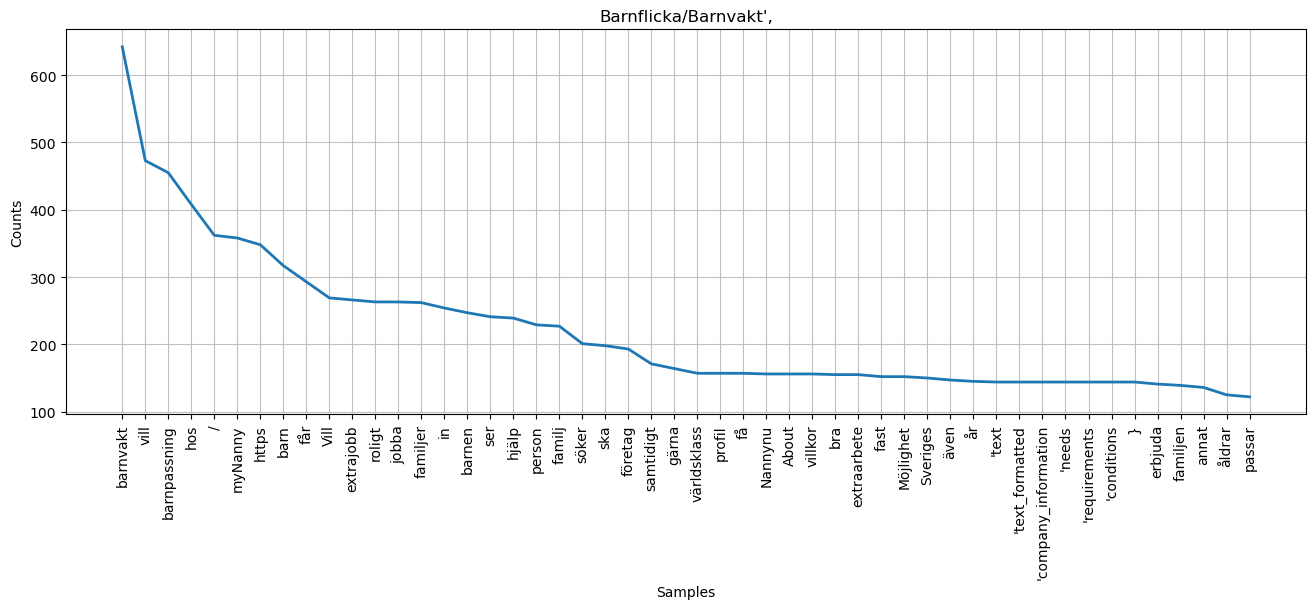

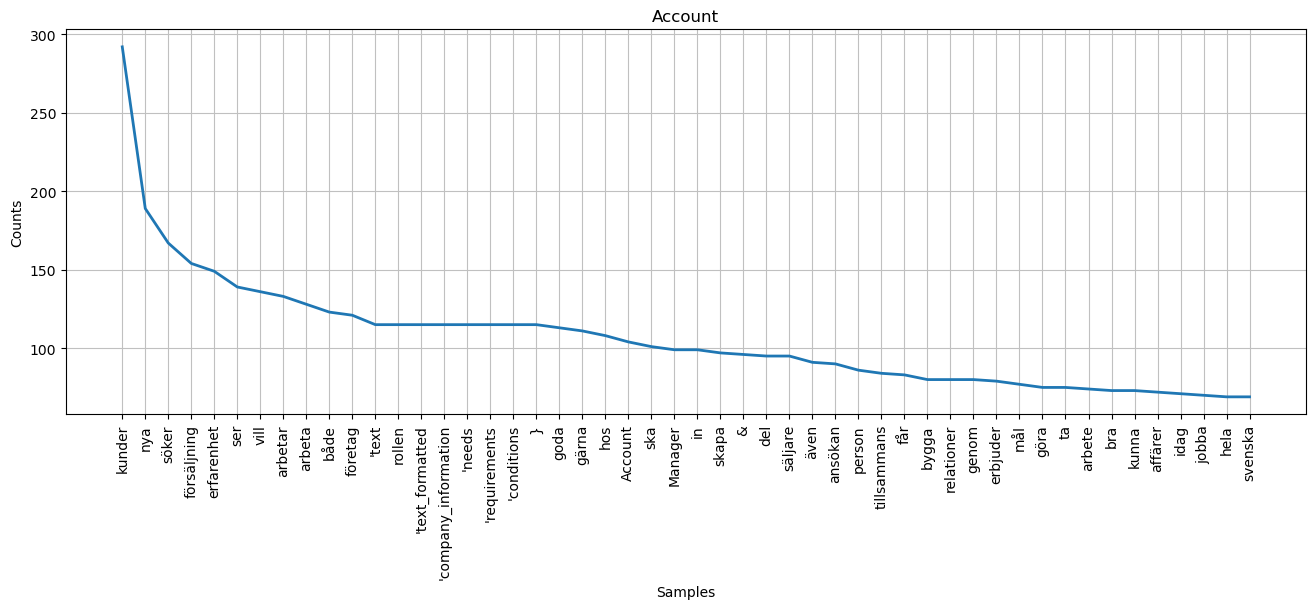

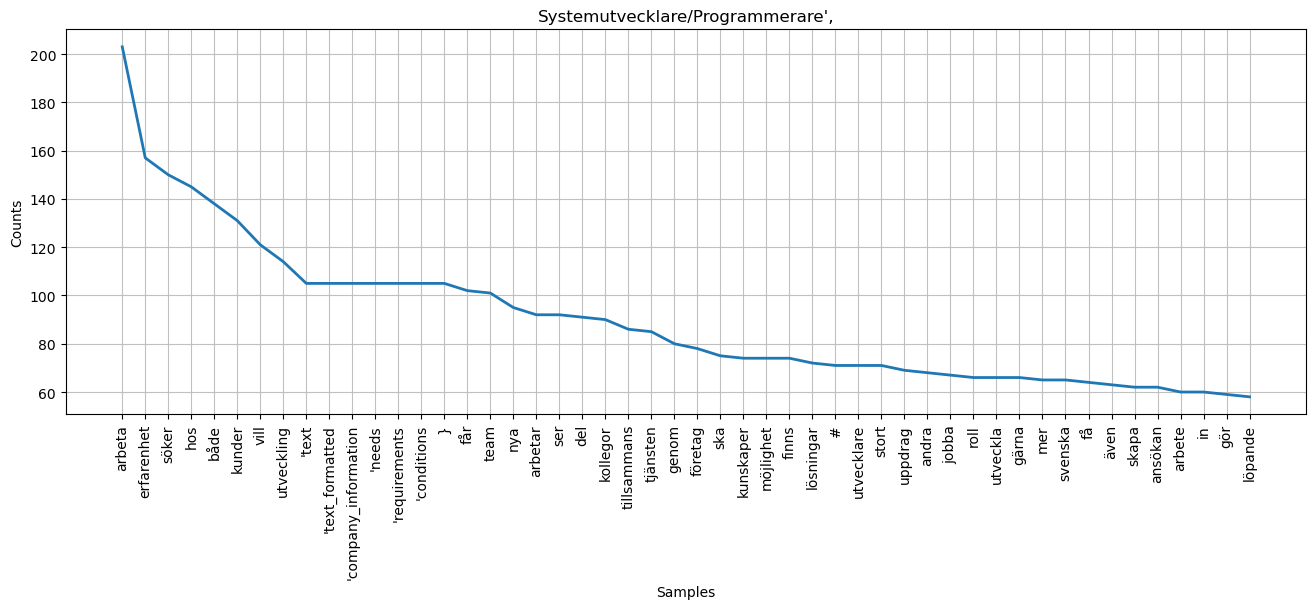

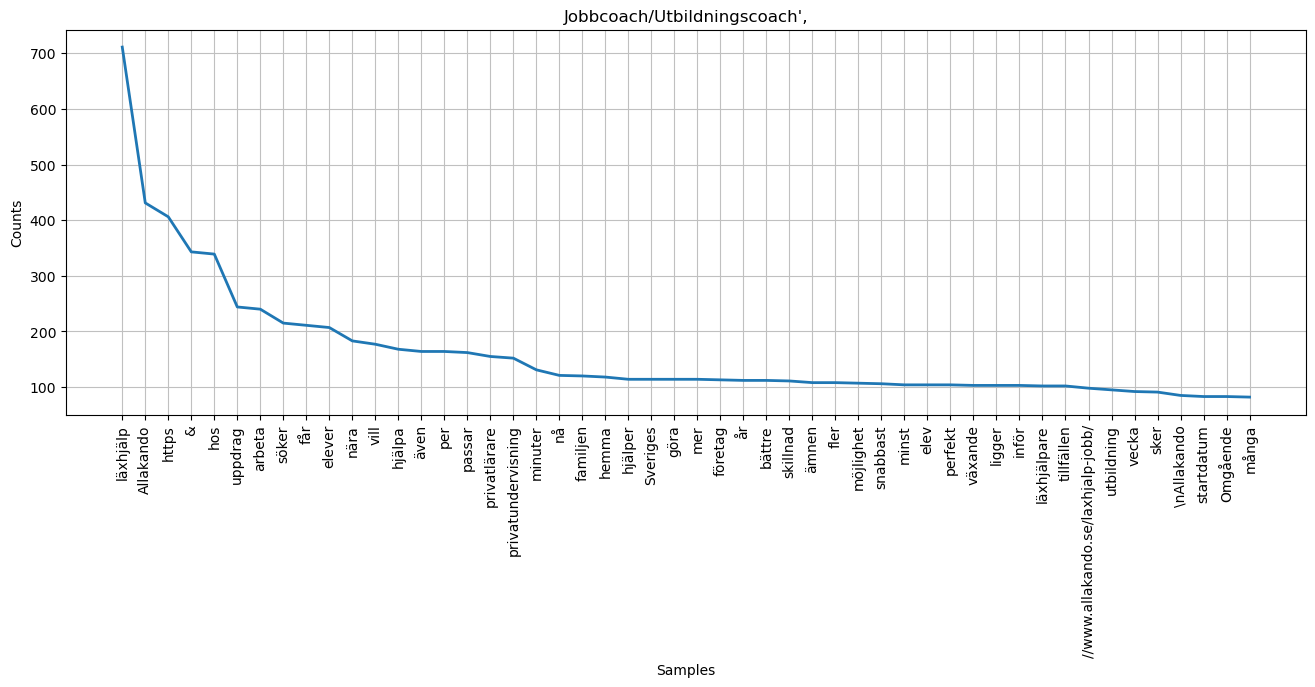

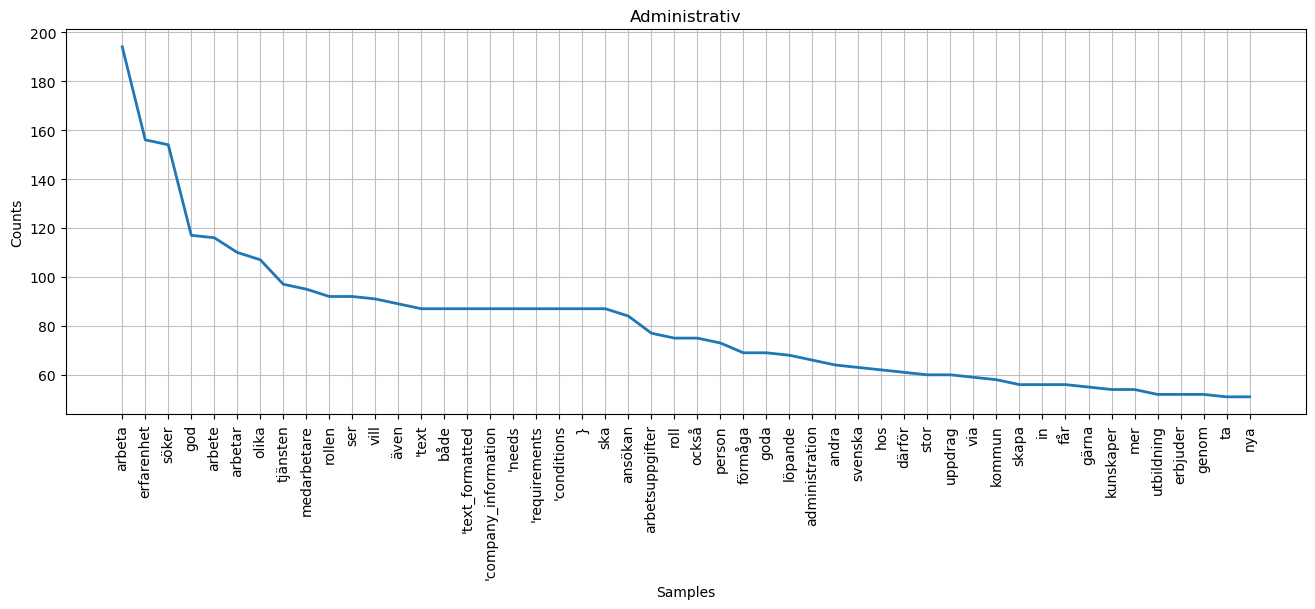

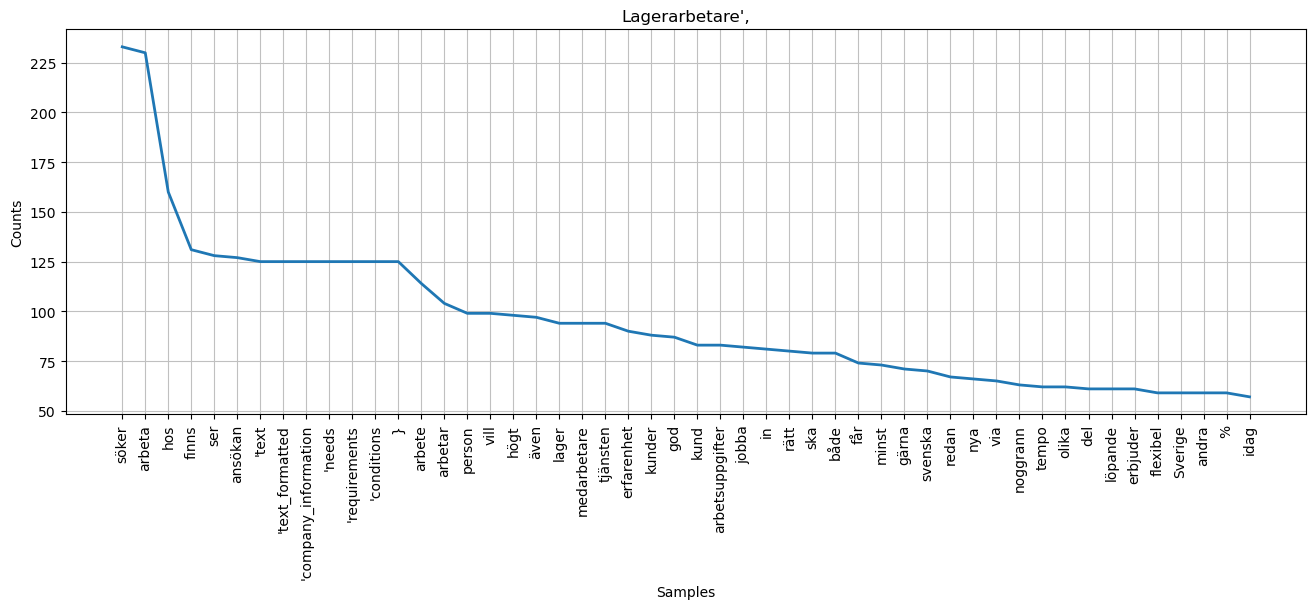

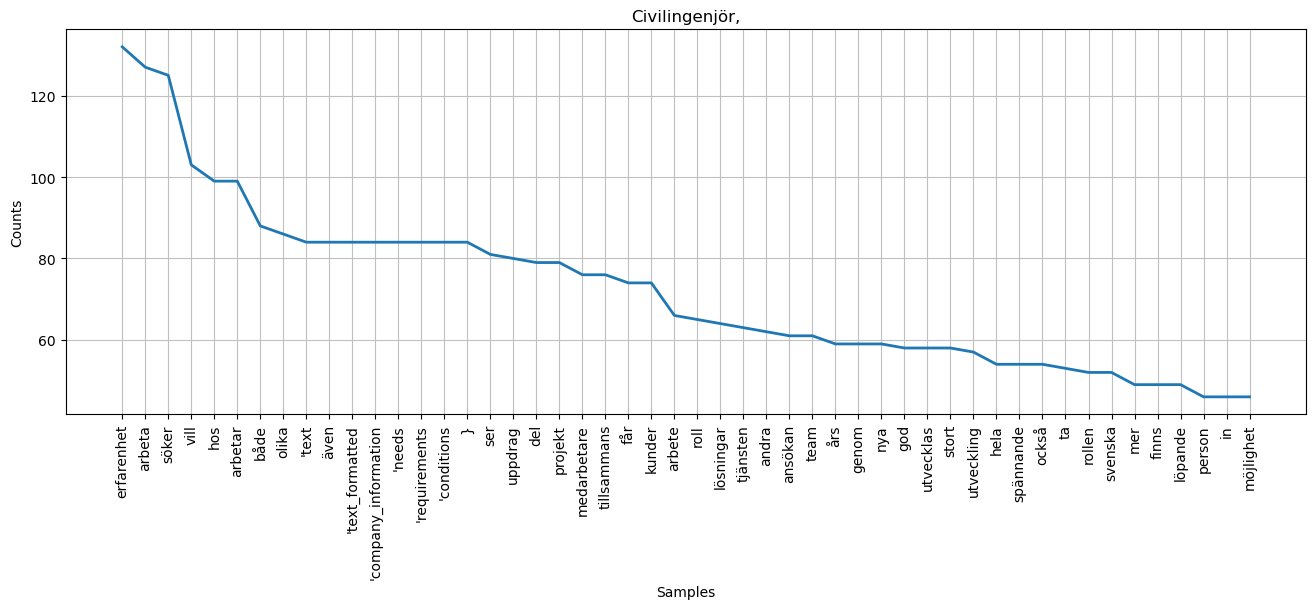

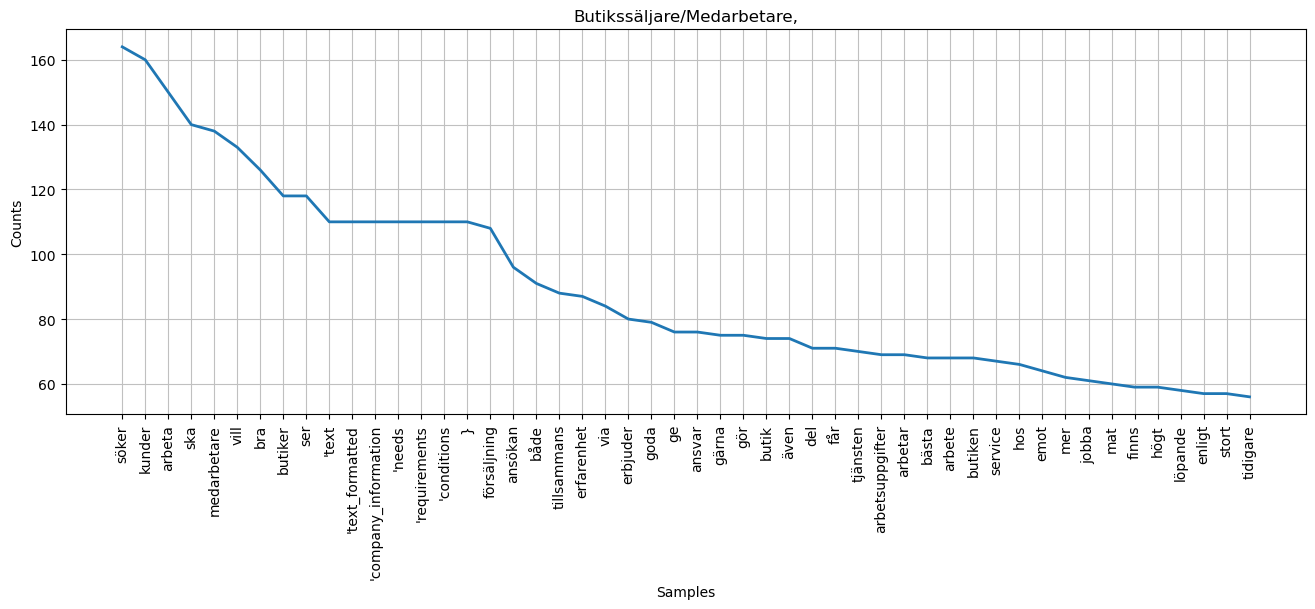

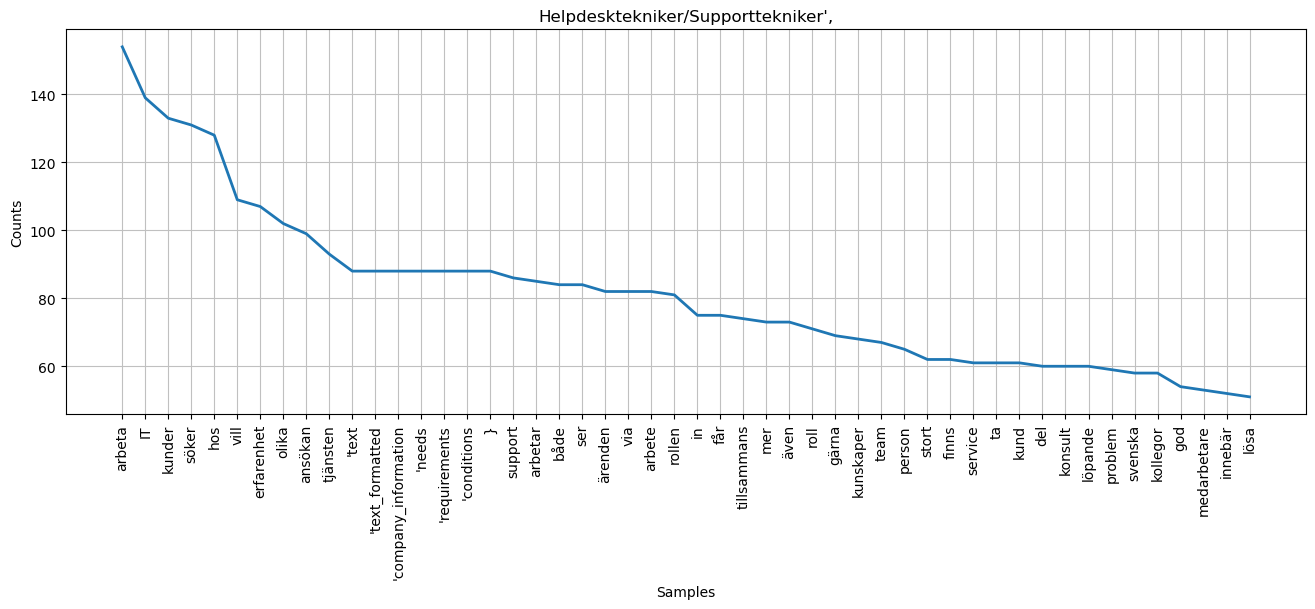

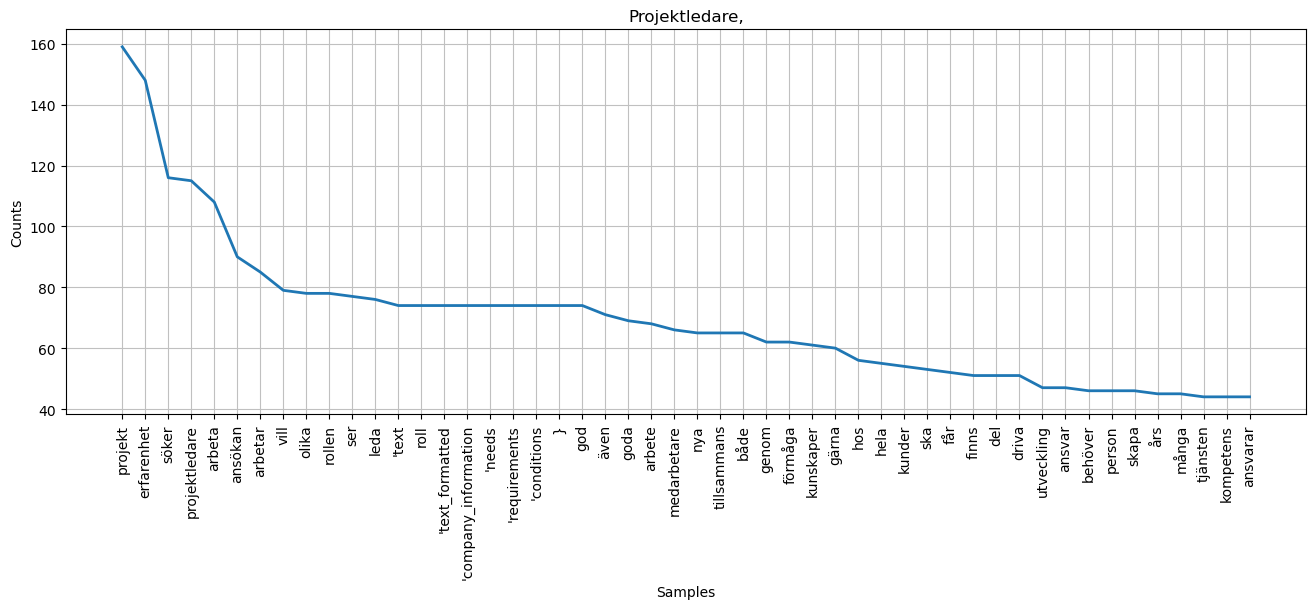

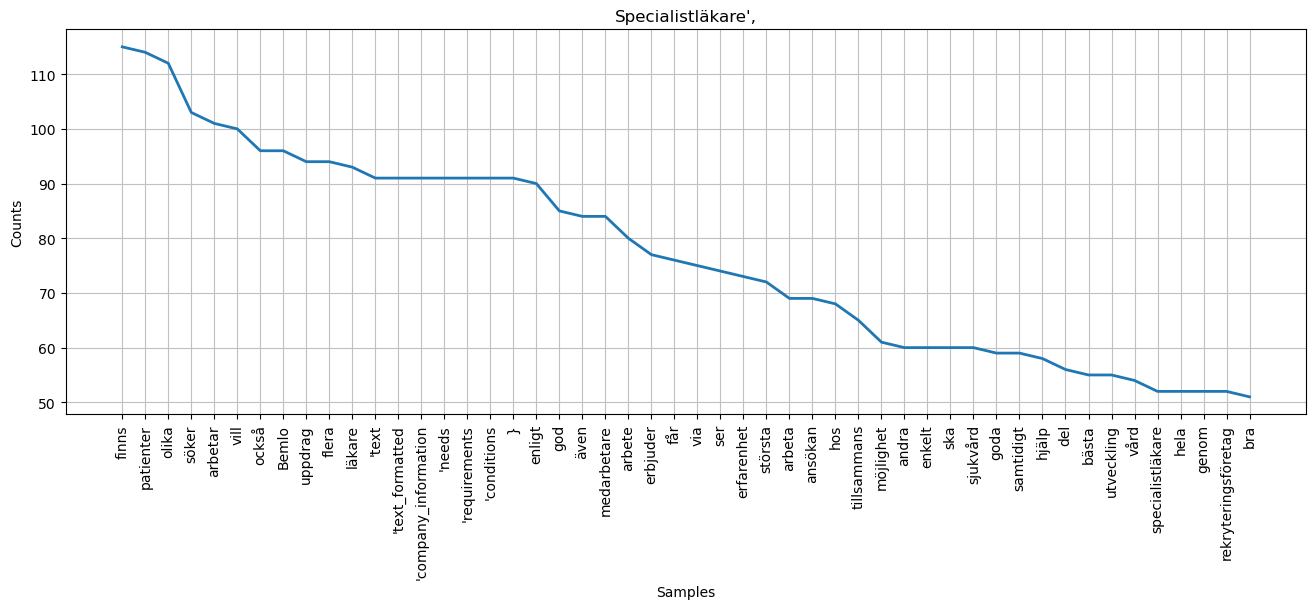

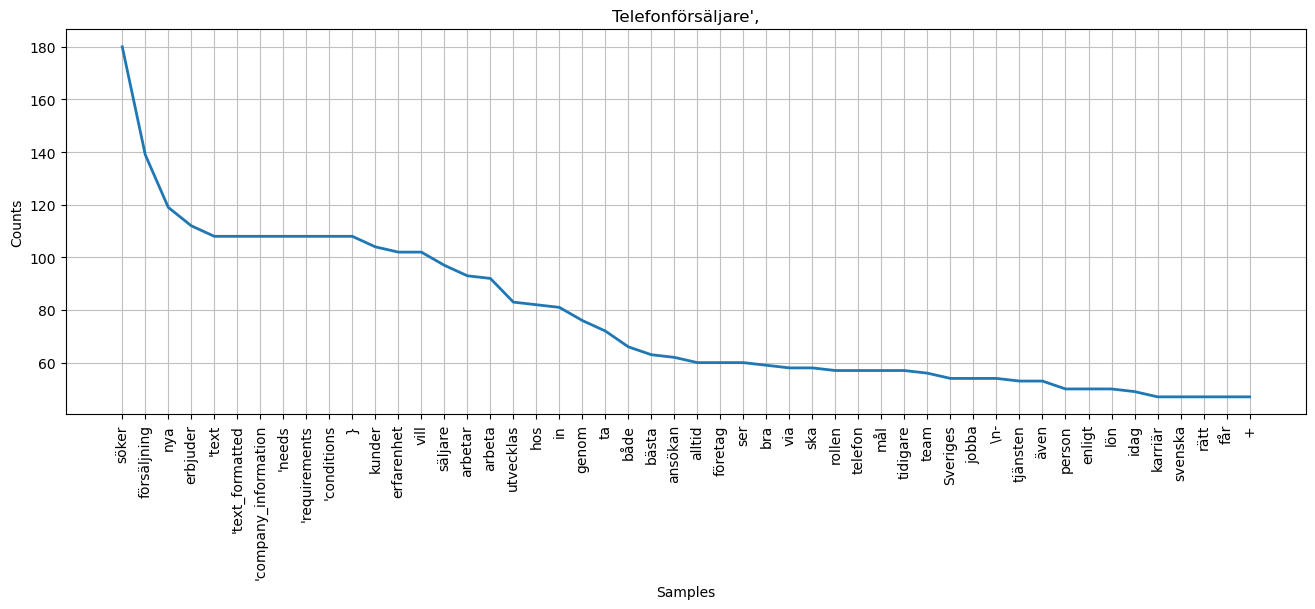

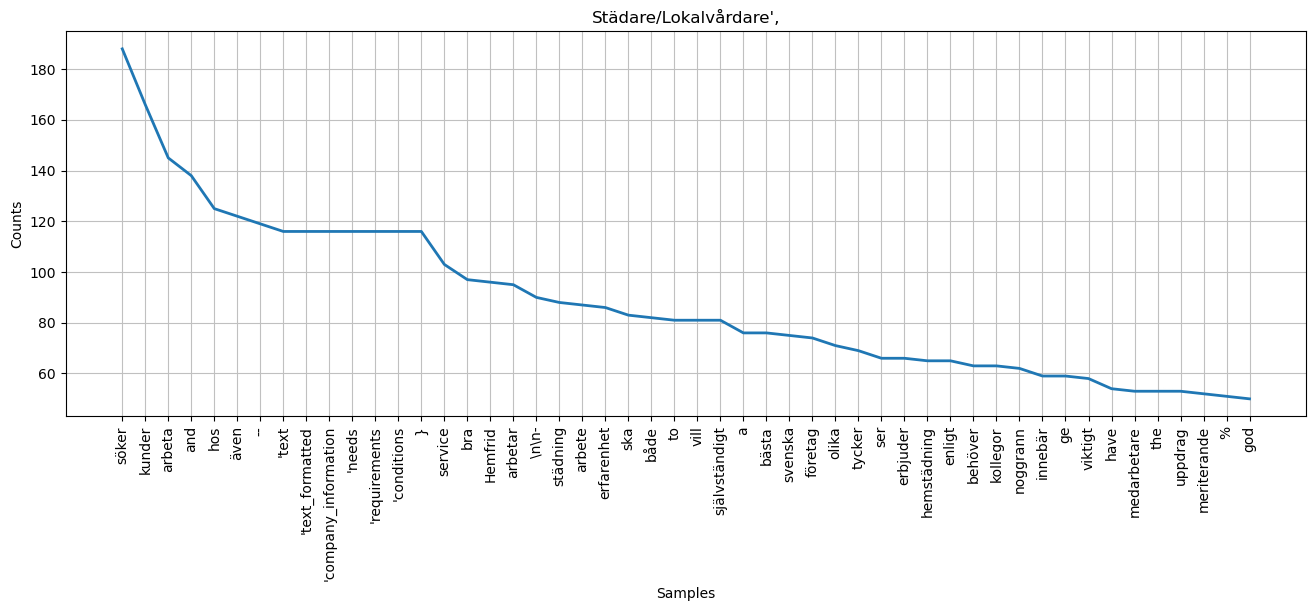

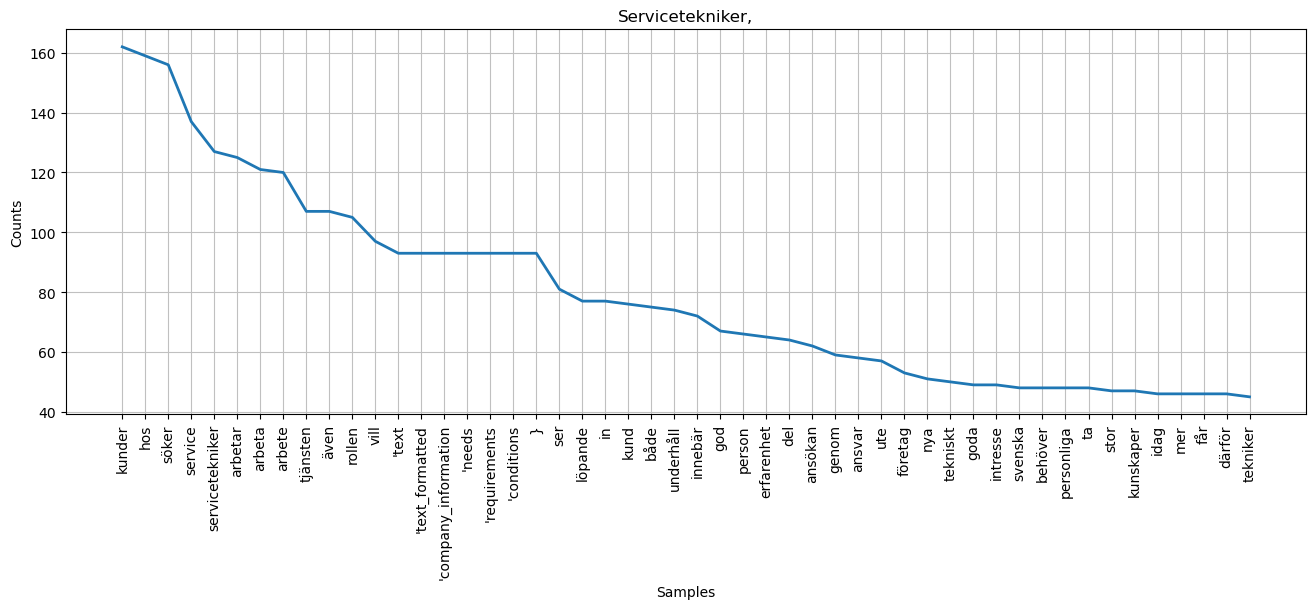

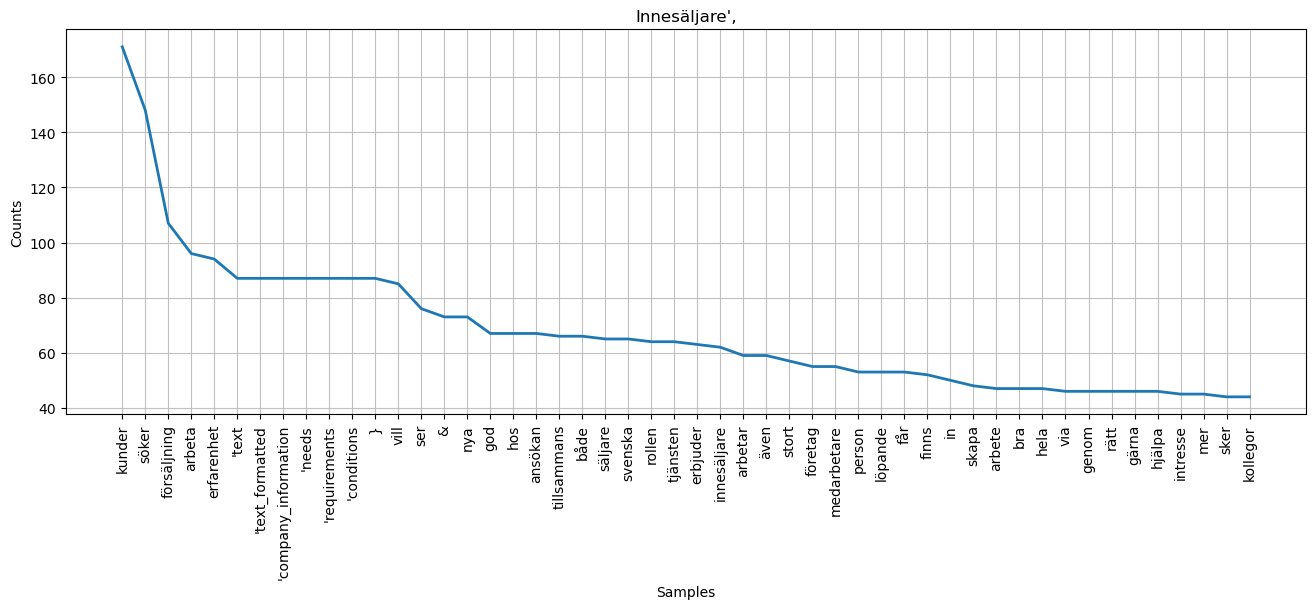

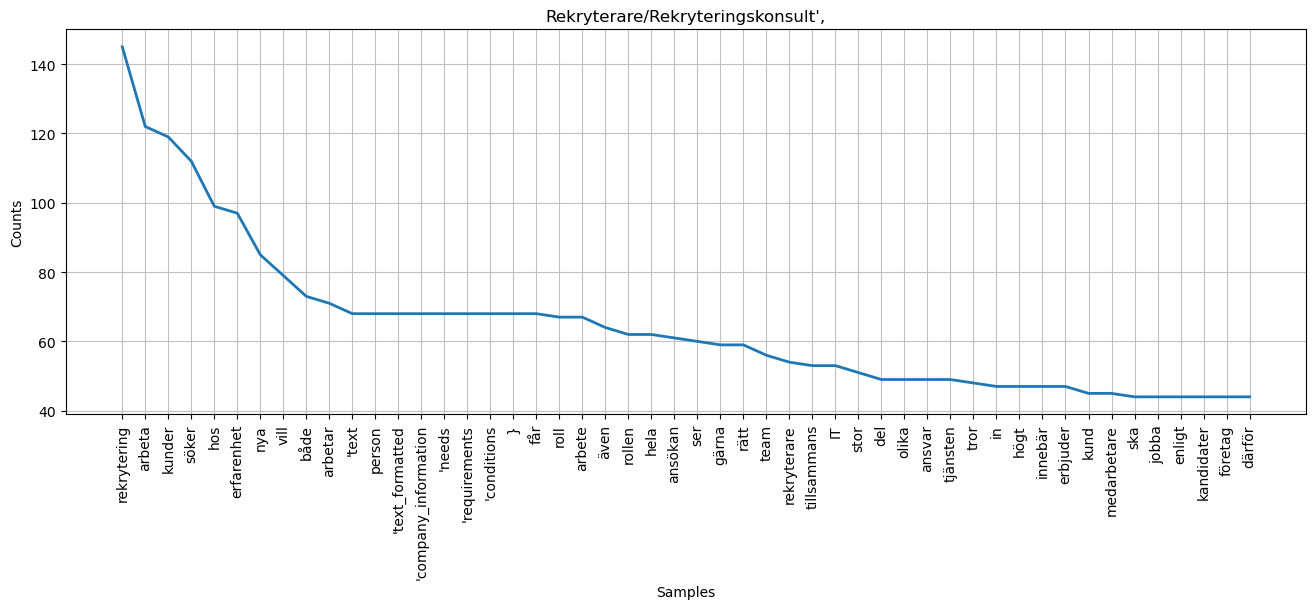

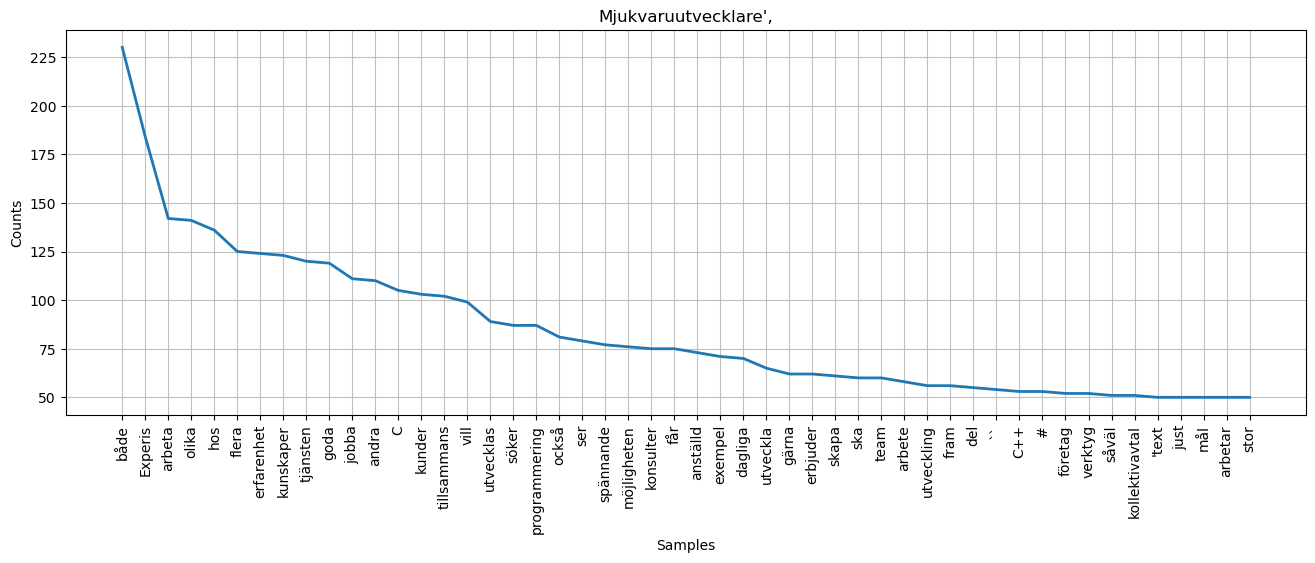

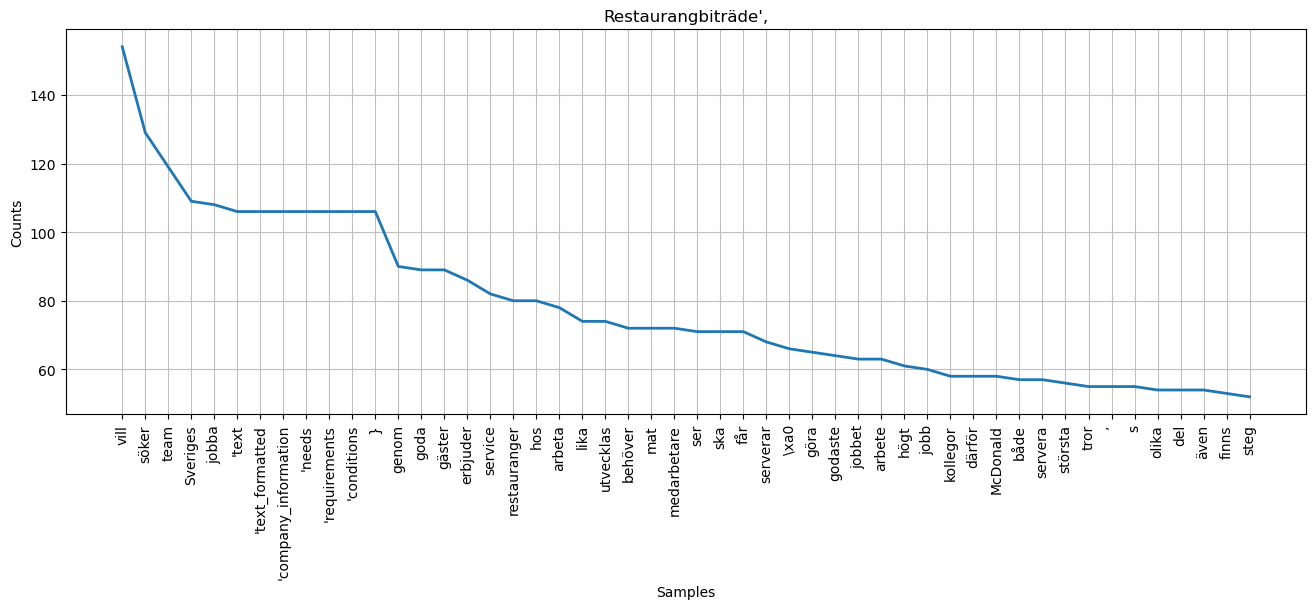

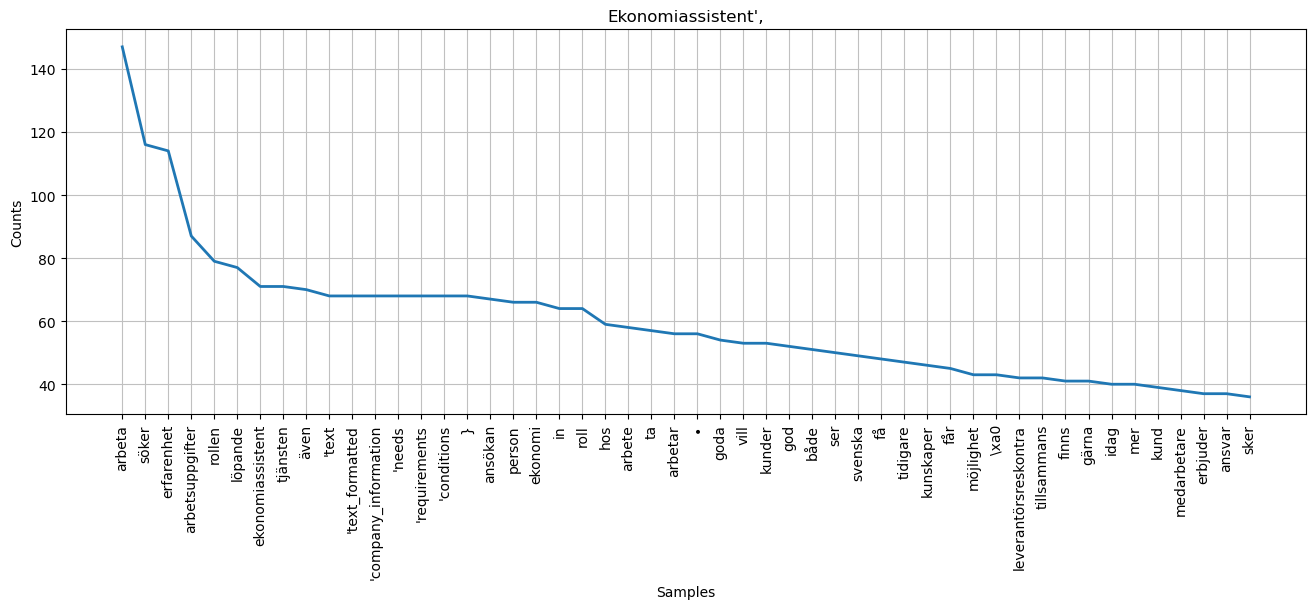

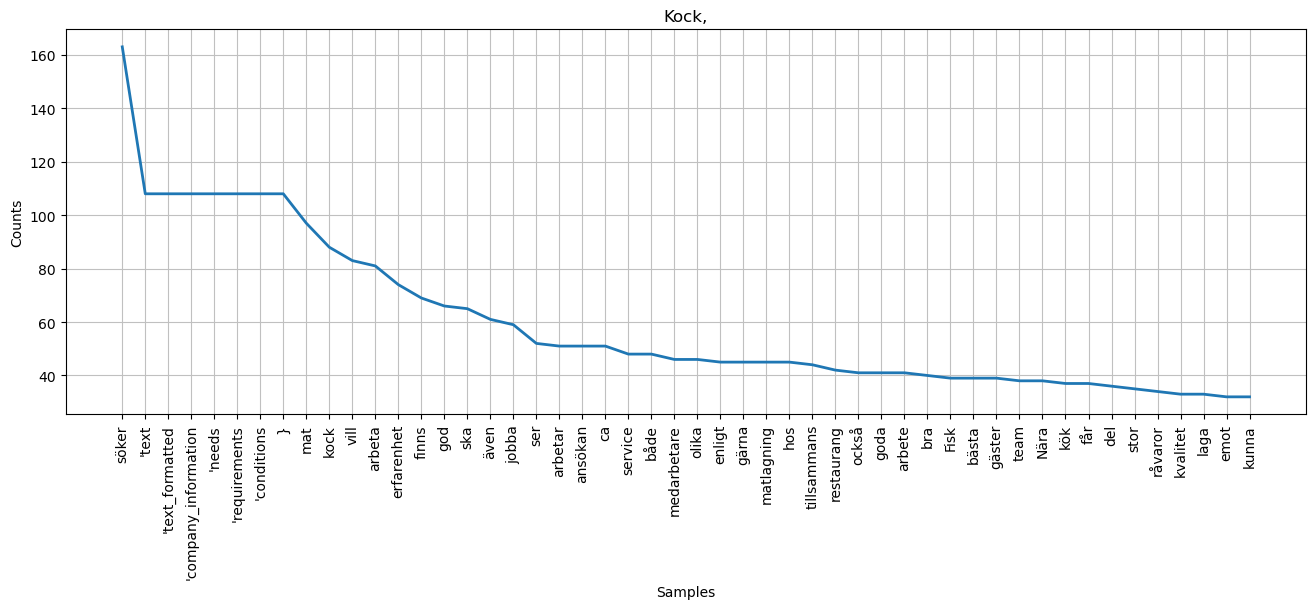

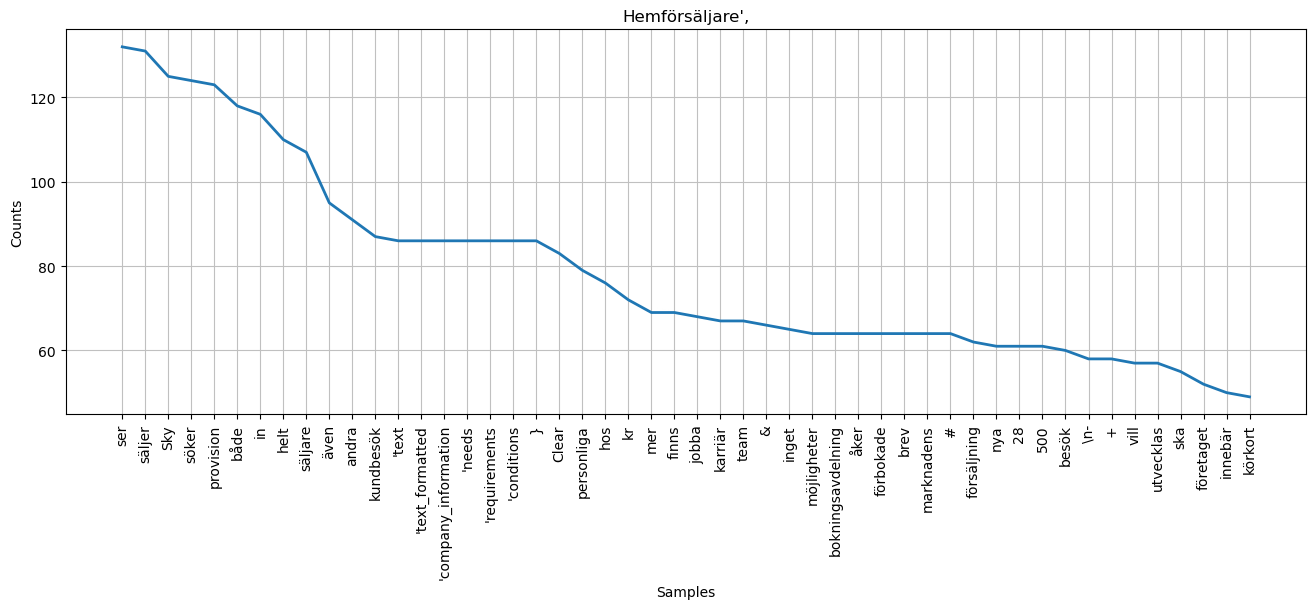

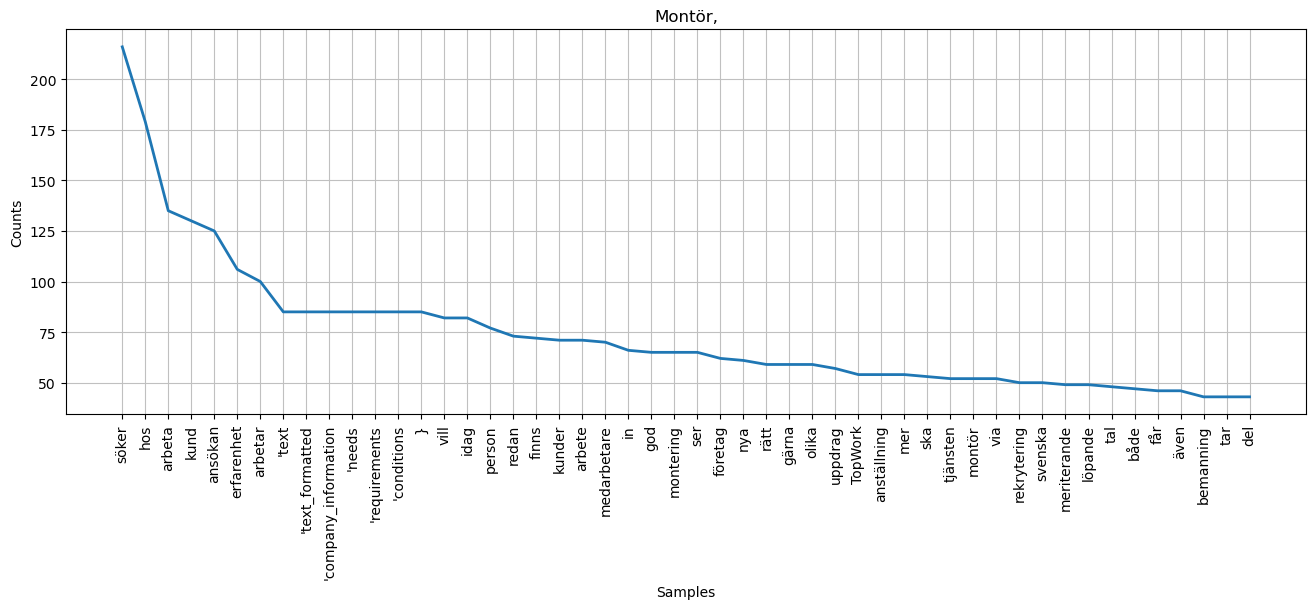

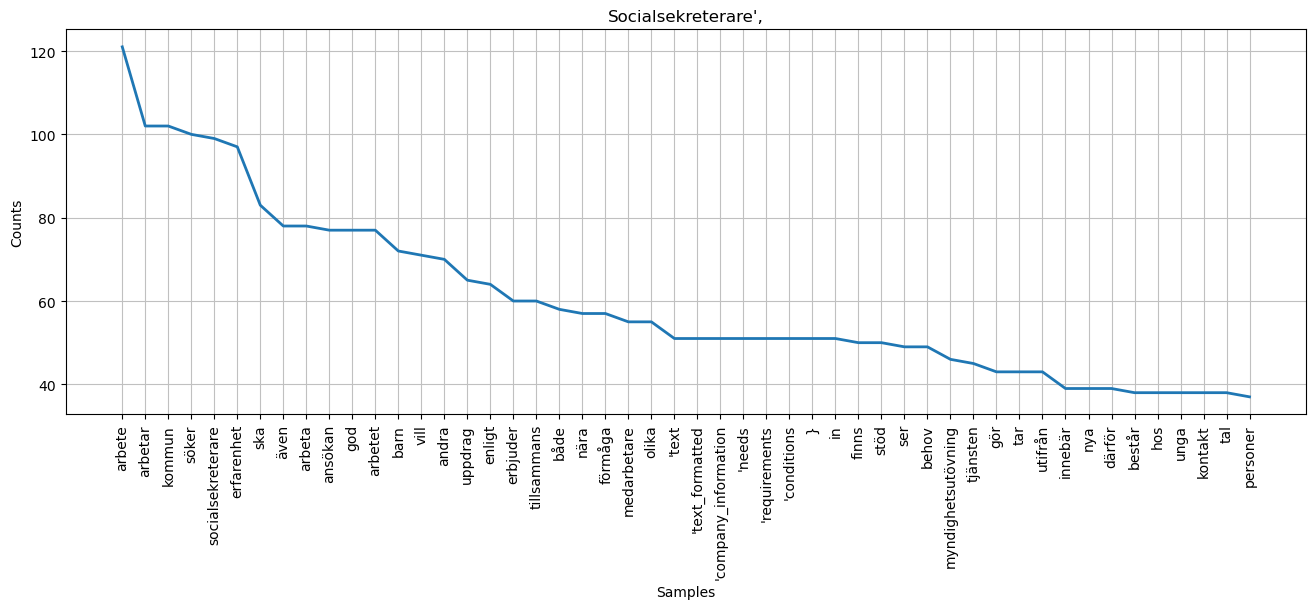

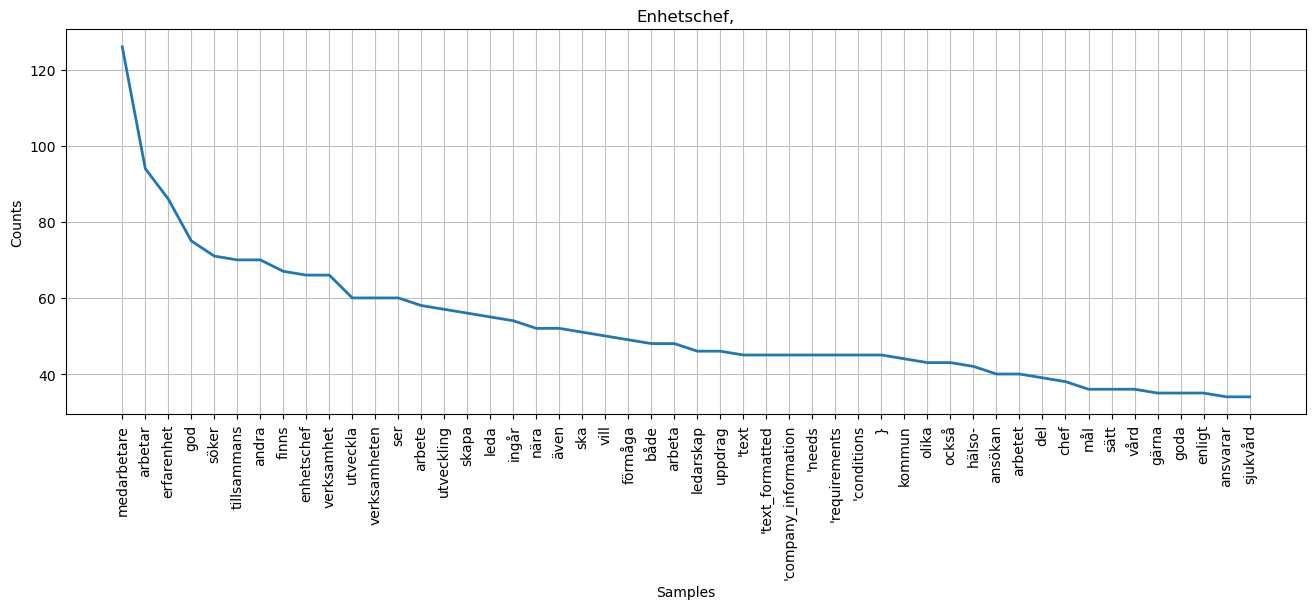

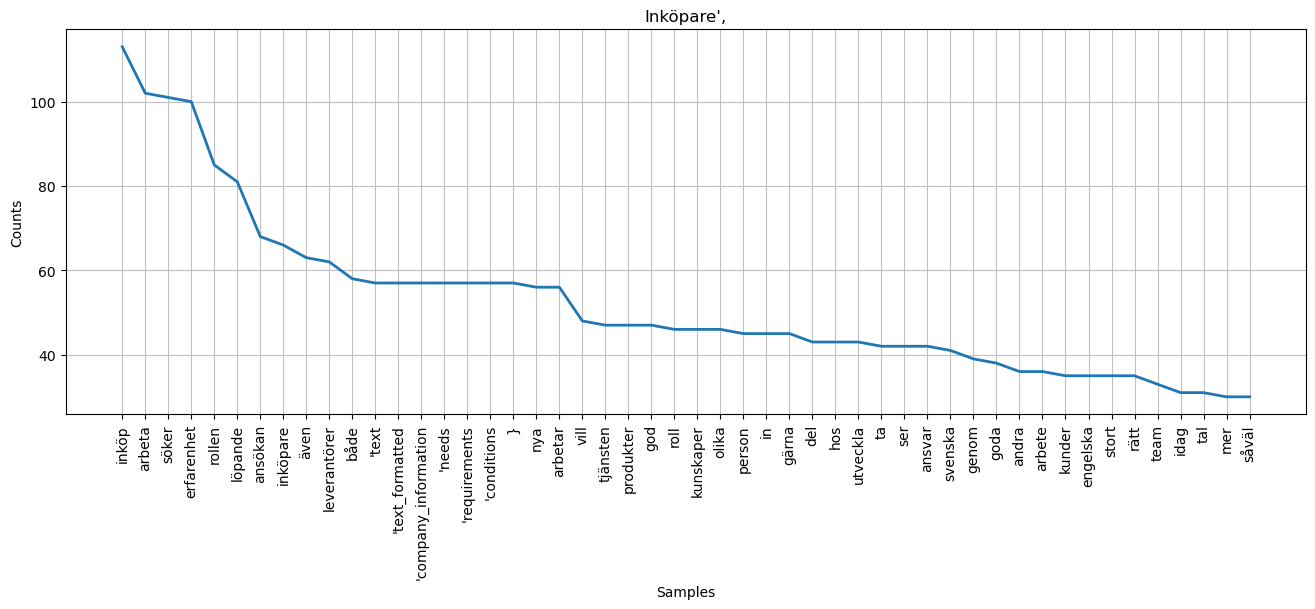

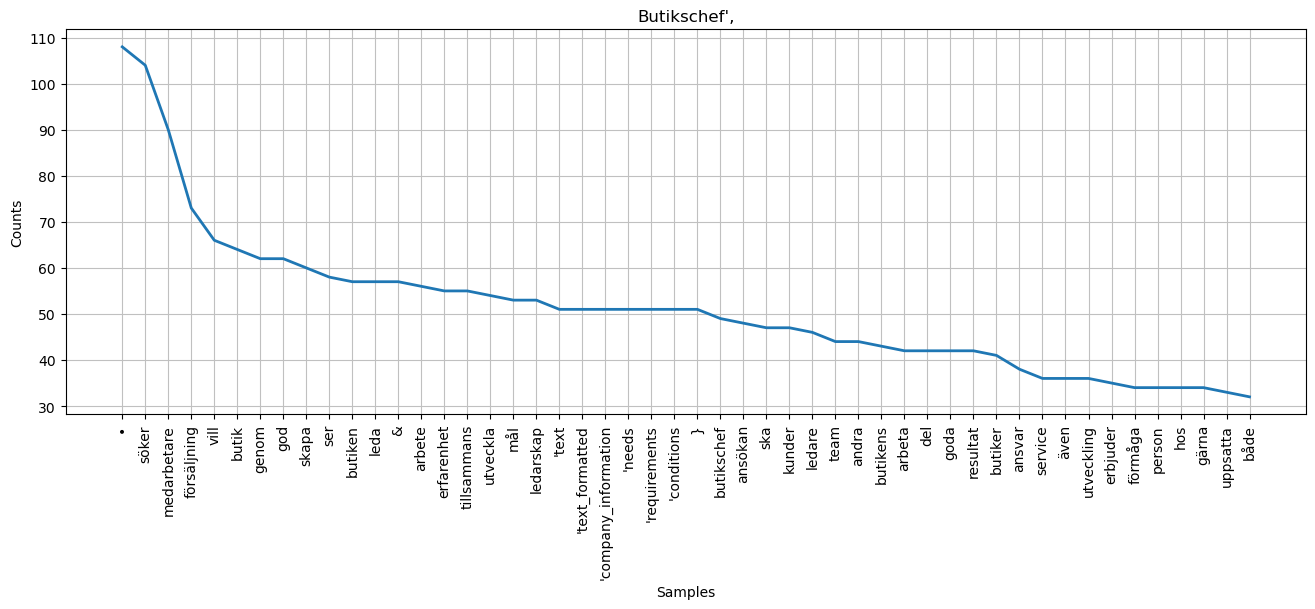

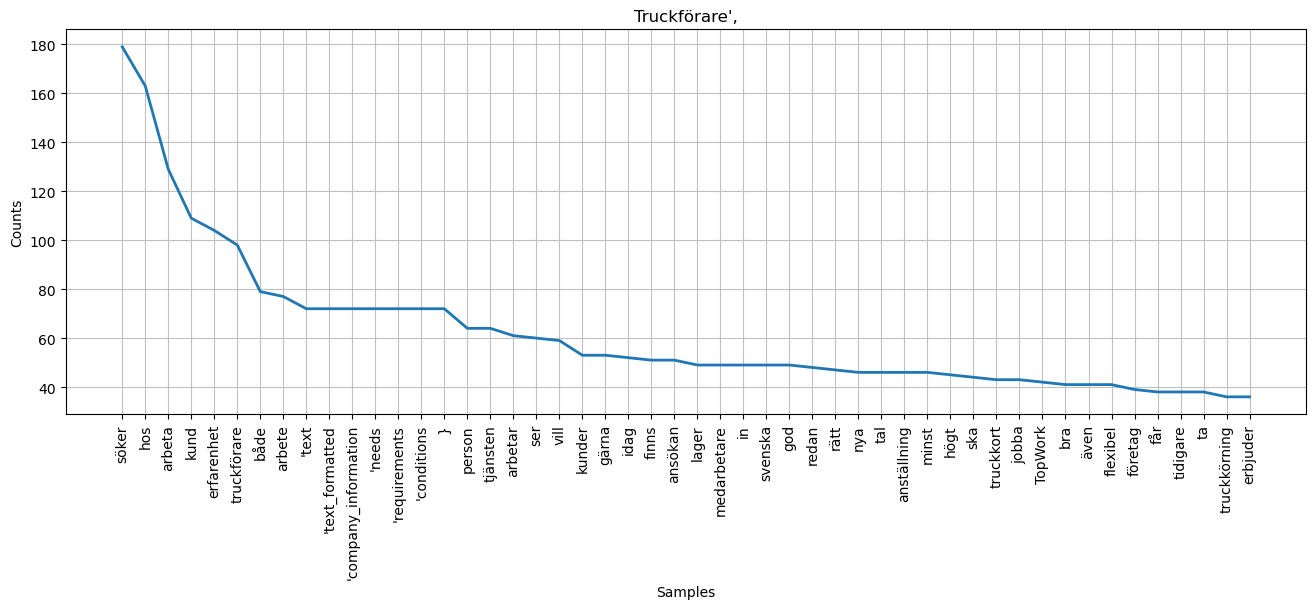

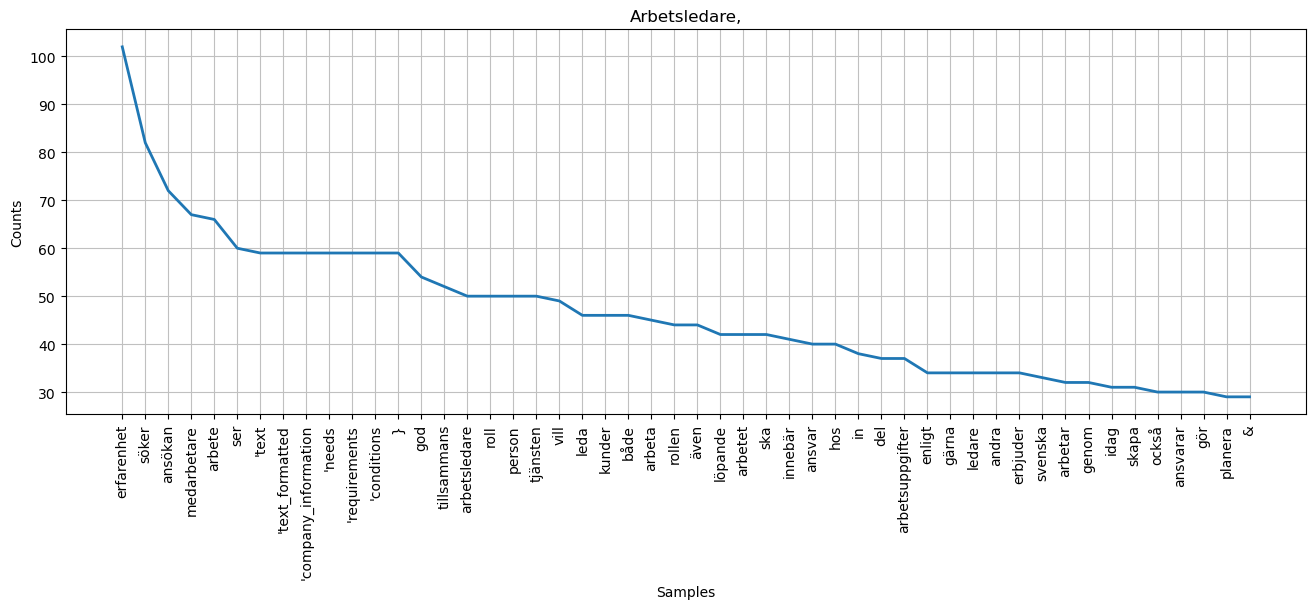

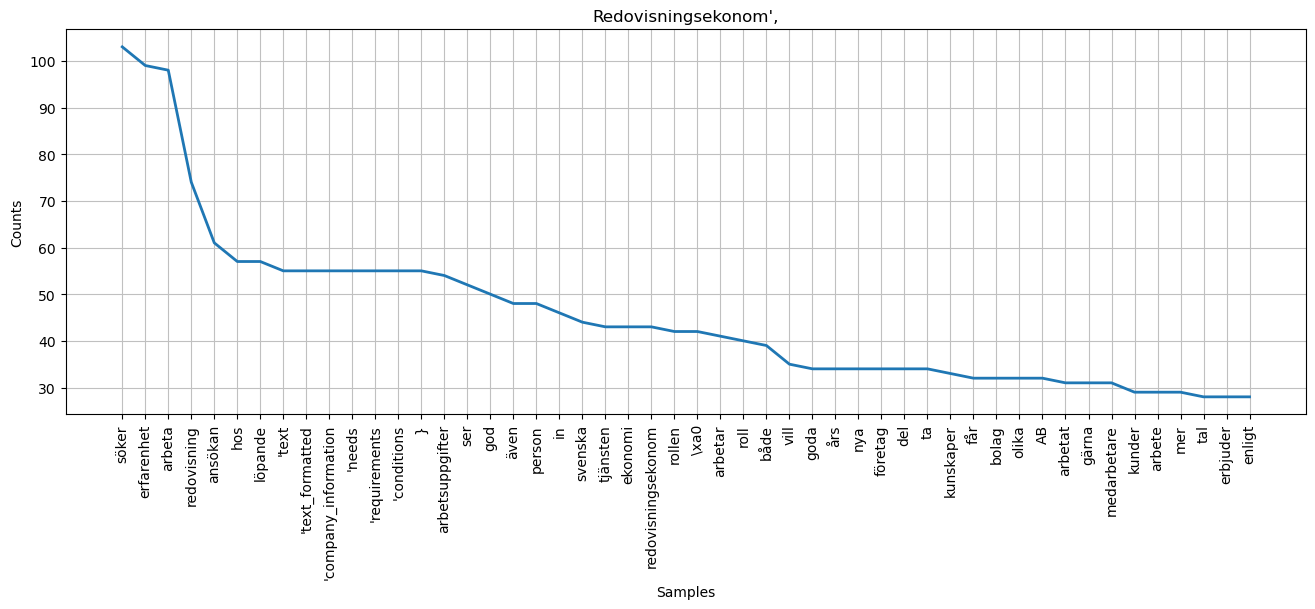

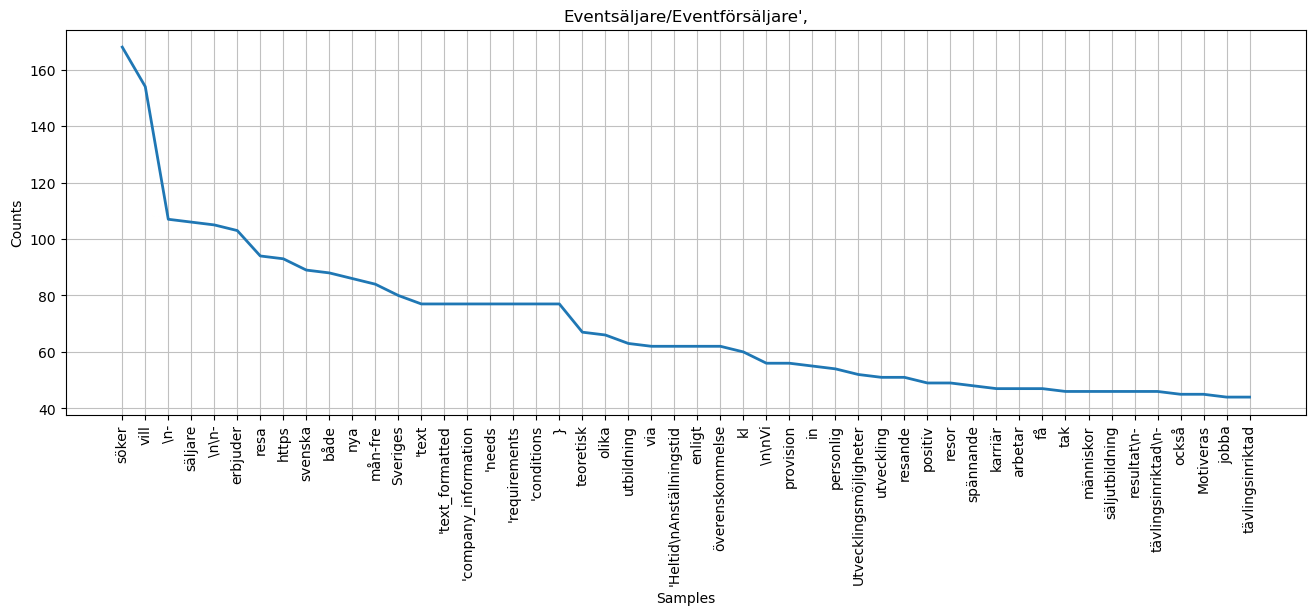

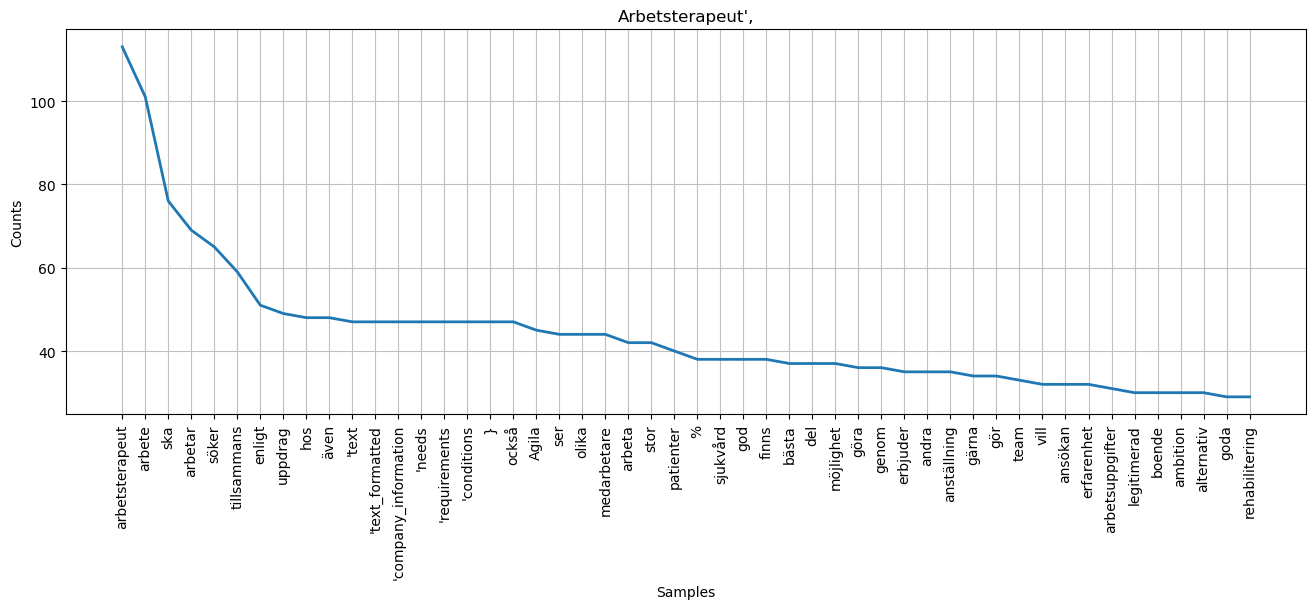

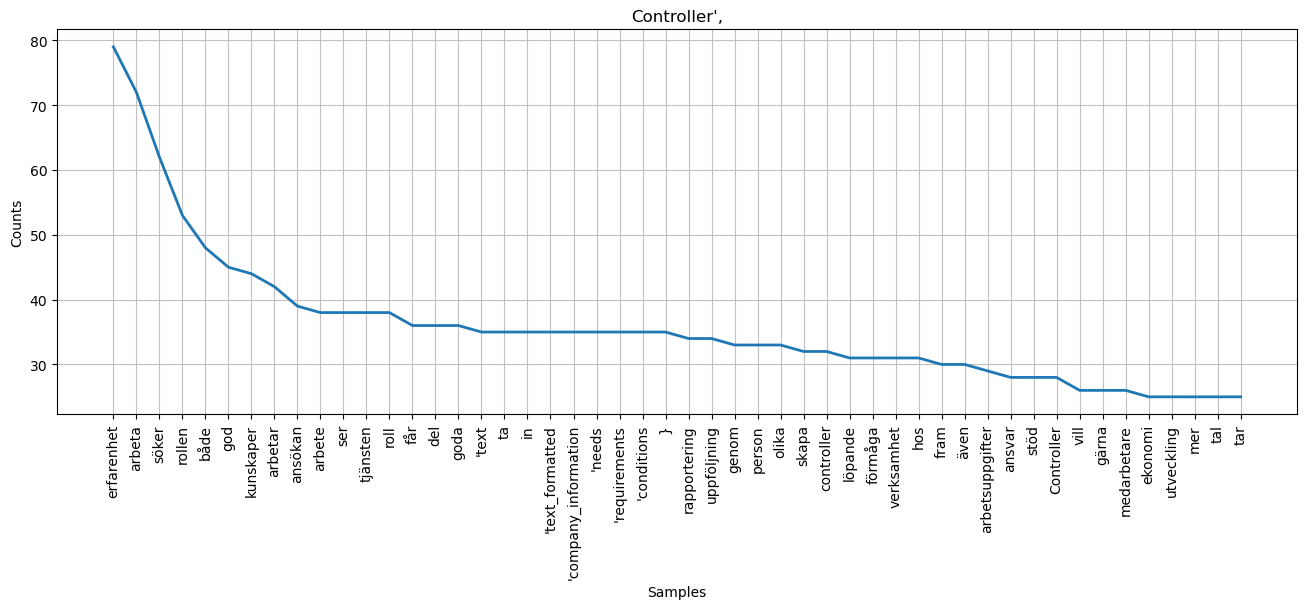

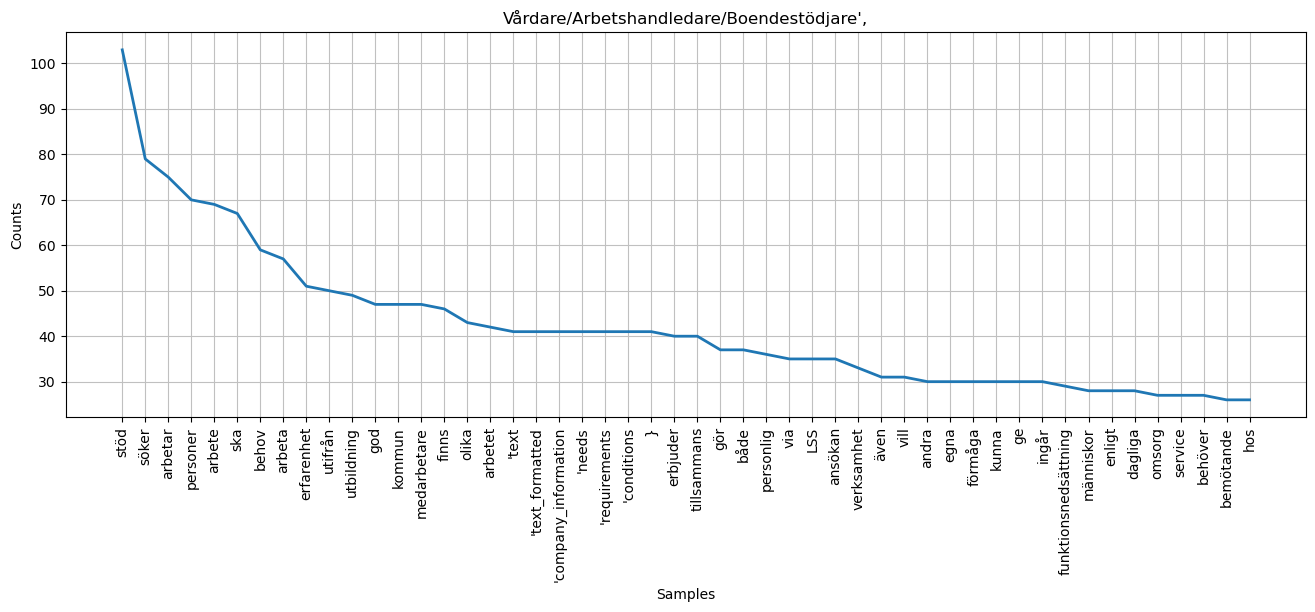

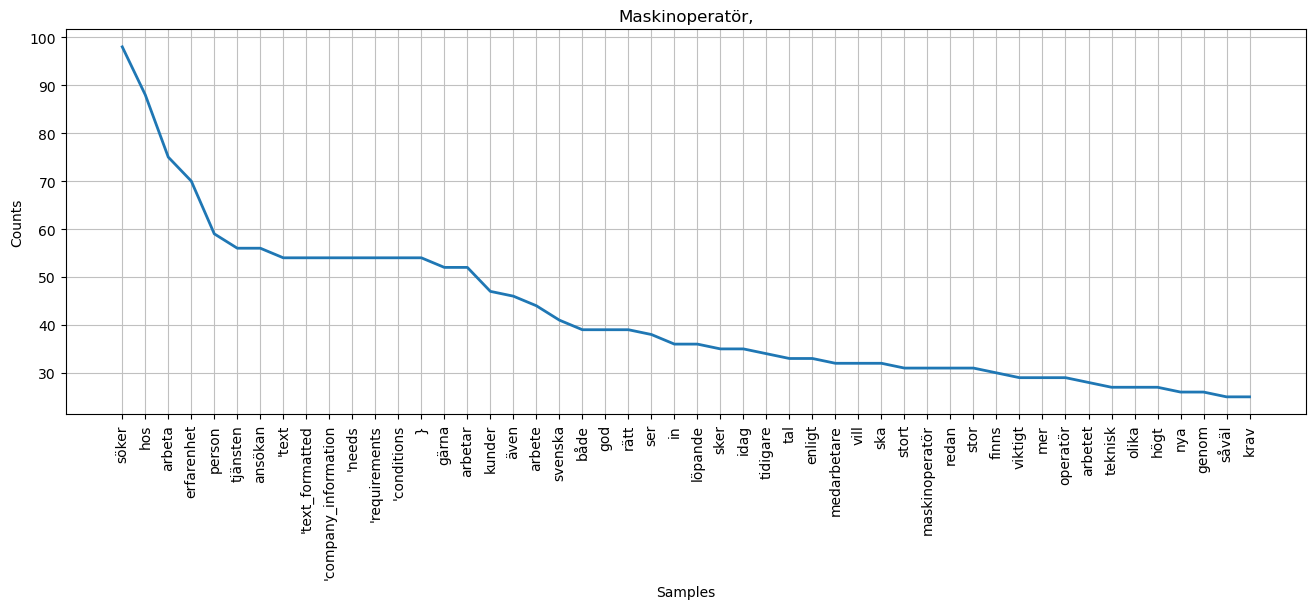

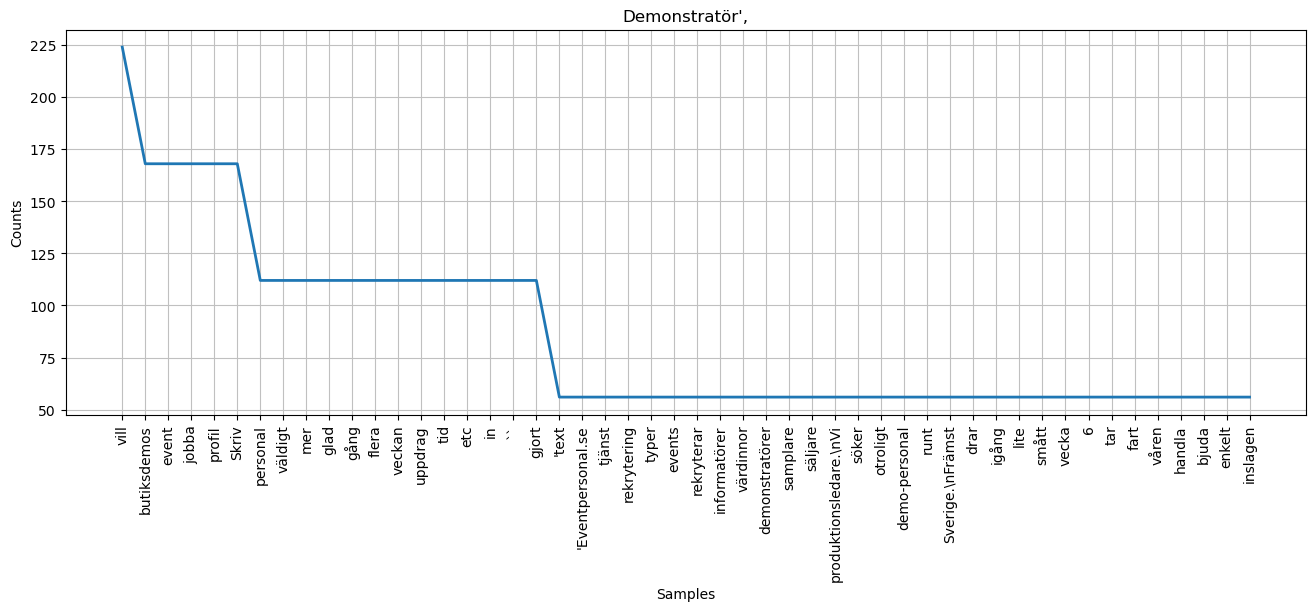

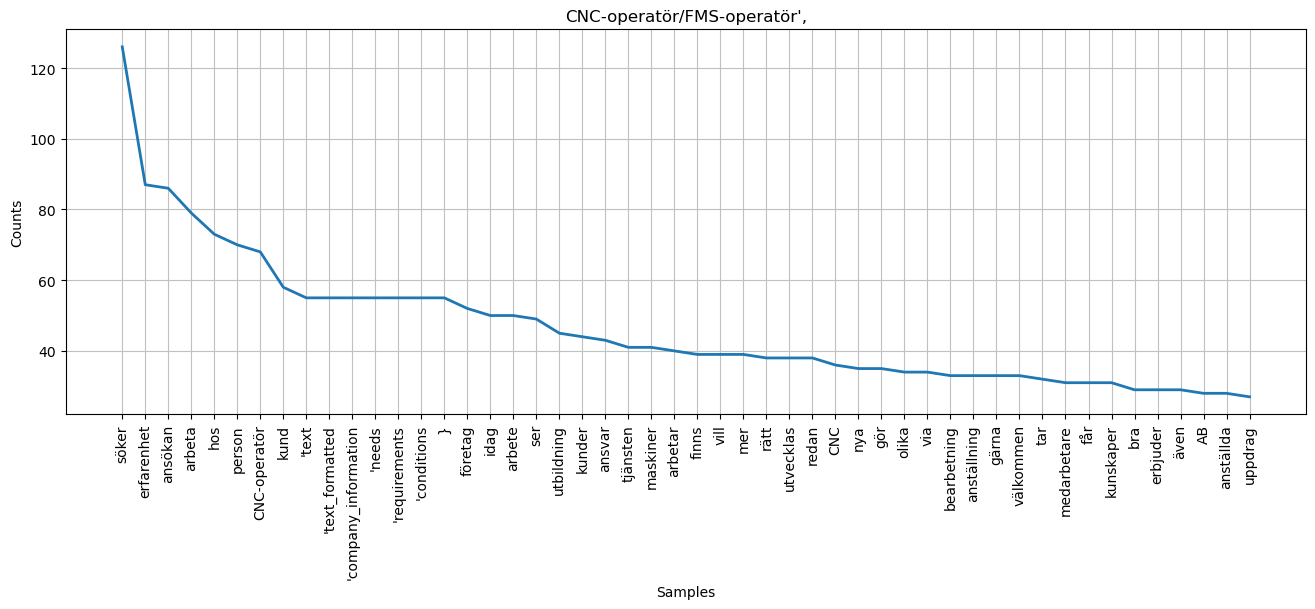

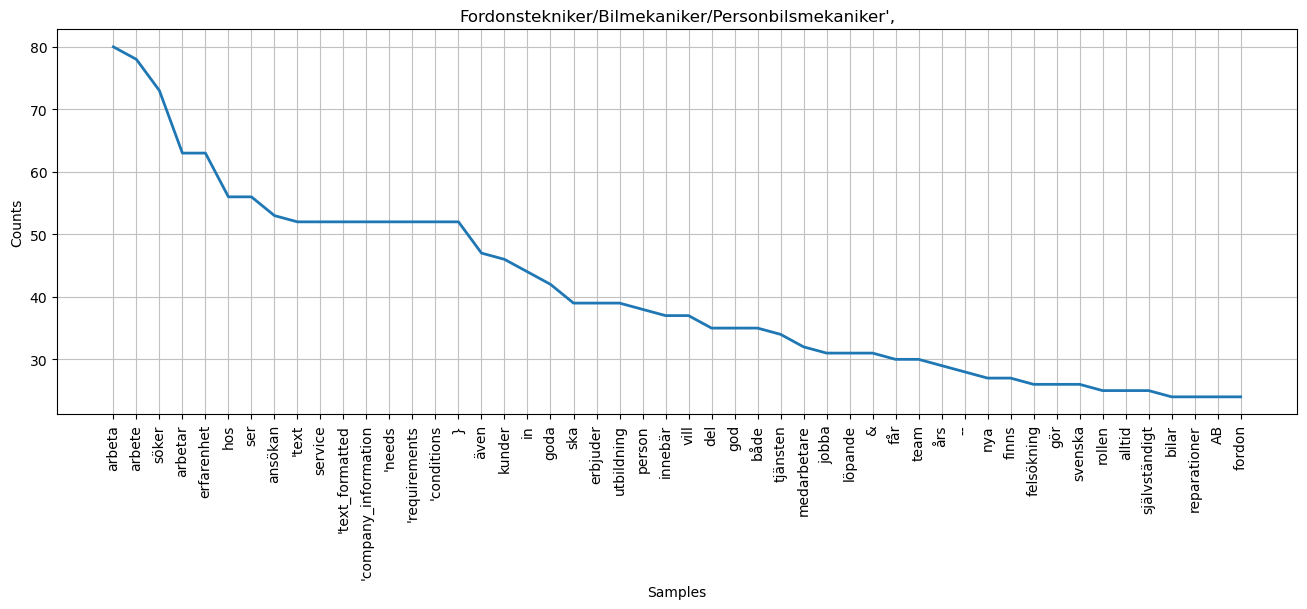

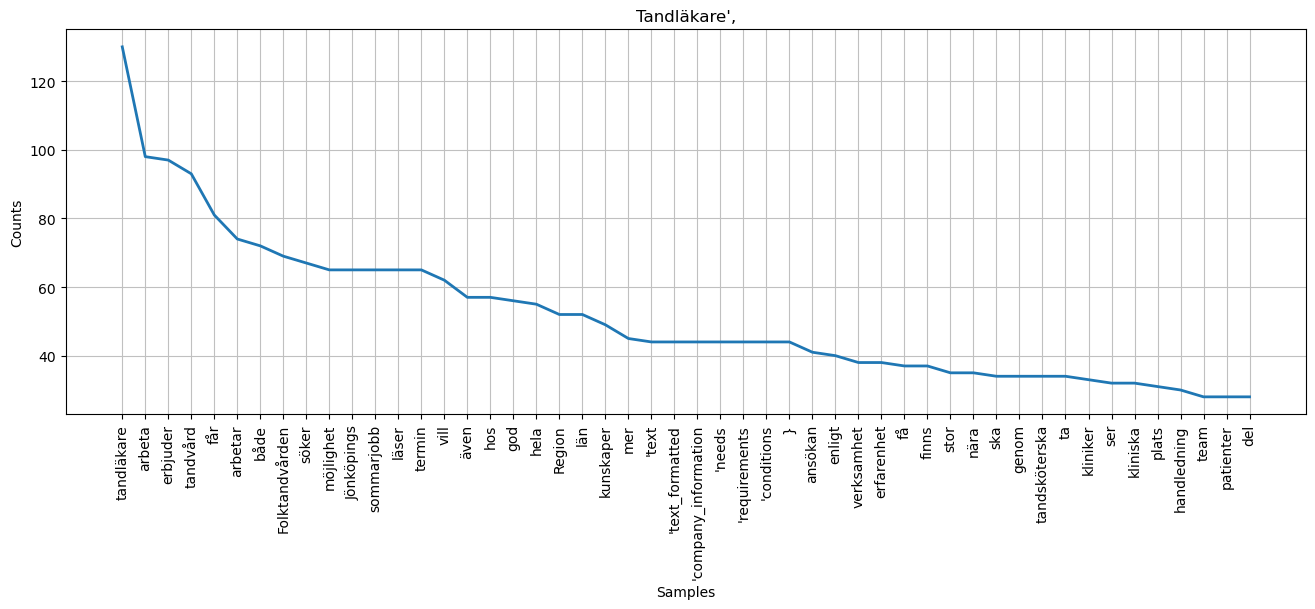

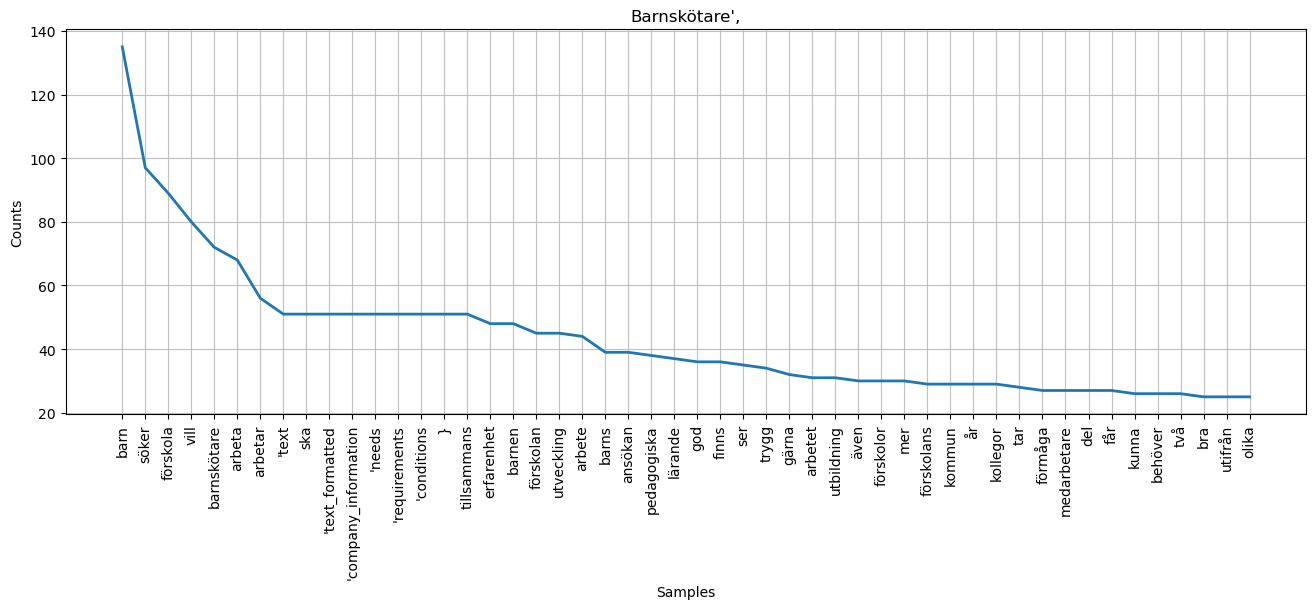

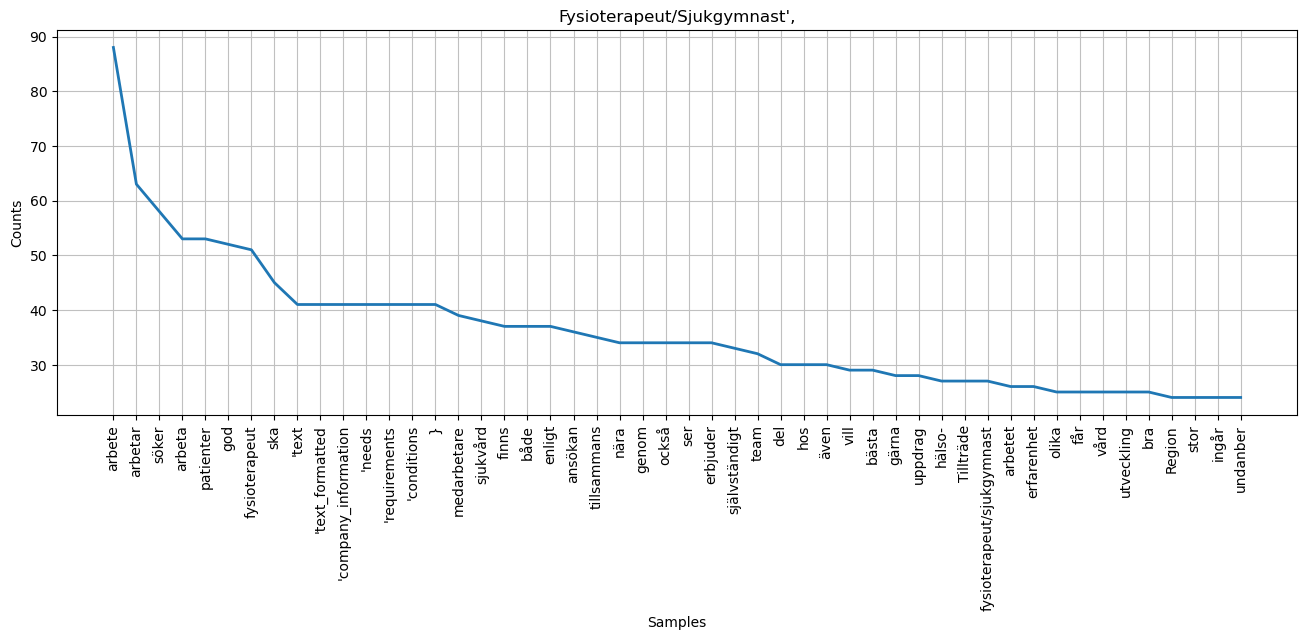

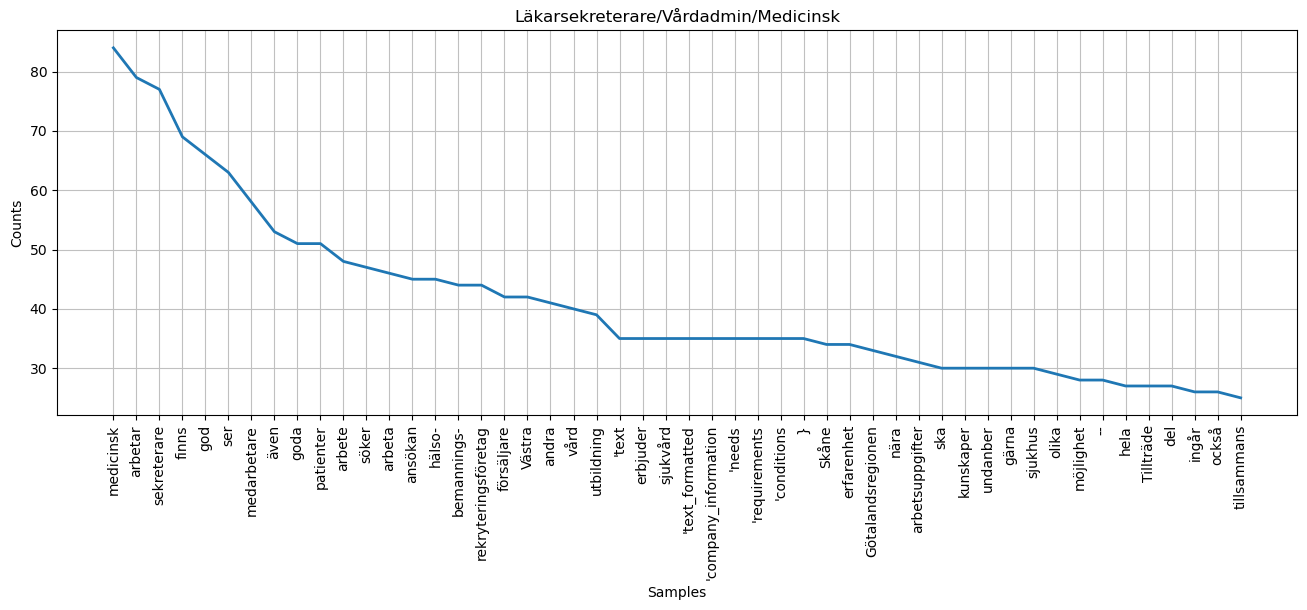

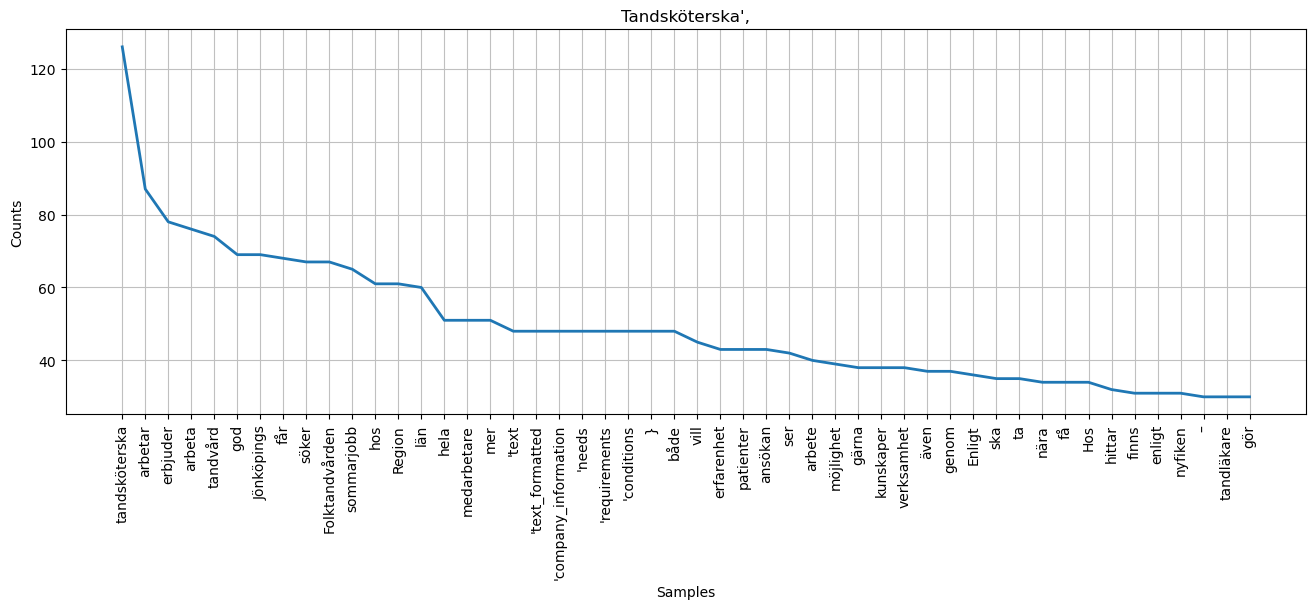

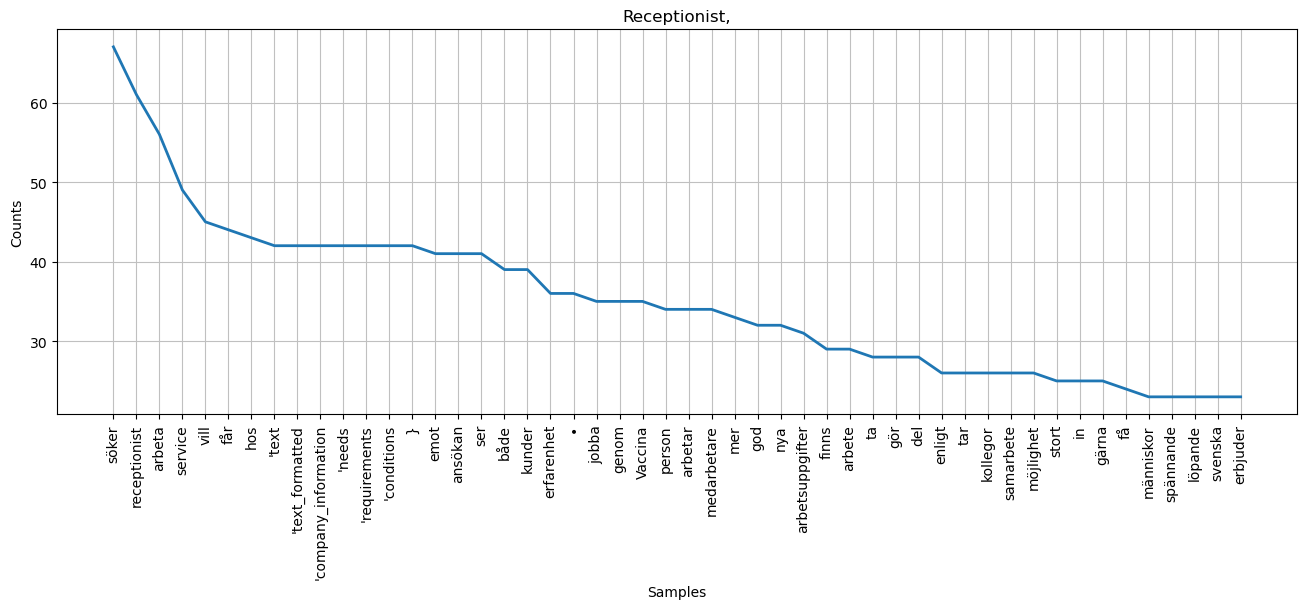

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import nltk
from nltk.corpus import stopwords
import string

swedish_stop_words = stopwords.words('swedish') + ['samt', 'text', 'None', ',', '.', ':', '!', '*', '(', ')', '?', '{', 'kommer', '-', "'"] + [string.punctuation]

df = pd.read_csv('dfsvenska.csv')[['description', 'occupation']]
df['description'] = df['description'].apply(lambda text: ' '.join([word for word in nltk.word_tokenize(text) if word.lower() not in swedish_stop_words and word != 'None']))
df['cleaned_occupation'] = df['occupation'].apply(lambda occupation: occupation[41:].split()[0])

new_df = df.groupby('cleaned_occupation')['description'].apply(lambda descriptions: ' '.join(descriptions)).reset_index()
word_freqs = []

for occupation, descriptions in zip(new_df['cleaned_occupation'], new_df['description']):
    tokens = nltk.word_tokenize(descriptions)
    filtered_tokens = [word for word in tokens if word.lower() not in swedish_stop_words]
    freq_dist = FreqDist(filtered_tokens)
    word_freqs.append((occupation, freq_dist))

# Sort the occupations by the total number of words in their descriptions
word_freqs = sorted(word_freqs, key=lambda x: sum(x[1].values()), reverse=True)

# Visualize only the top 20 occupations with the largest amount of data about word frequency
for occupation, freq_dist in word_freqs[:50]:
    plt.figure(figsize=(16,5))
    plt.title(occupation)
    freq_dist.plot(50)
    plt.show()